# Lag Selection: correlation plots
Conda environment: `time-series`  
17 Mar 2024

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.axes import Axes
from matplotlib.ticker import MaxNLocator

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import ccf
from statsmodels.tsa.seasonal import MSTL

In [2]:
# Configs
# Plot configs:
sns.set_context("paper", font_scale= 1.5)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plotsize = (22, 5)
plt.rcParams['figure.figsize'] = plotsize
# Pandas config
pd.options.display.float_format = '{:,.4f}'.format
pd.options.display.max_columns = 200

In [4]:
### Functions
def lag_plot(y: pd.Series, x: pd.Series, lag: int, ax: Axes=None, data_point_size: int=10) -> Axes:
    """Lag plot between target time series (y) and feature time series (x).
    Args:
        y (pd.Series): target time series (e.g. sales).
        x (pd.Series): feature time series (e.g. ad spend).
        lag (int): the amount, we want to lag by.
        ax (Axes, optional): axes object. Defaults to None.
        data_point_size (int, optional): Dot size. Defaults to 10.
    Returns:
        Axes: Lag plot Axes object.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=[5,5])
    ax.scatter(y=y, x=x.shift(periods=lag), s=data_point_size)
    ax.set_ylabel("$y_t$")
    ax.set_xlabel(f"$x_{{t-{lag}}}$")
    return ax

def plot_ccf(y: pd.Series, x: pd.Series, lags: int) -> Axes:
    """Plot the Cross Correlation Function (CCF) and its confidence interval (CI)
    Args:
        y (pd.Series): target time series (e.g. sales).
        x (pd.Series): feature time series (e.g. ad spend).
        lags (int): the amount, we want to lag by.
    Returns:
        Axes: CCF plot.
    """
    # Compute CCF and confidence interval
    cross_corrs = ccf(x, y)
    ci = 2 / np.sqrt(len(y))
    # Plot
    fig, ax = plt.subplots(figsize=[10, 5])
    ax.stem(range(0, lags + 1), cross_corrs[: lags + 1]) # We care only of the second column from ccf output.
    ax.fill_between(range(0, lags + 1), ci, y2=-ci, alpha=0.2)
    ax.set_title("Cross-correlation")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    return ax

## 1) Input data

In [7]:
filename = "../datasets/AirQualityUCI_ready.csv"
data = pd.read_csv(filename, parse_dates=["Date_Time"], index_col=["Date_Time"])

data.sort_index(inplace=True)
data

CO_true  CO_sensor  NMHC_true  C6H6_true  NMHC_sensor  \
Date_Time                                                                    
2004-03-10 18:00:00   2.6000 1,360.0000   150.0000    11.9000   1,046.0000   
2004-03-10 19:00:00   2.0000 1,292.0000   112.0000     9.4000     955.0000   
2004-03-10 20:00:00   2.2000 1,402.0000    88.0000     9.0000     939.0000   
2004-03-10 21:00:00   2.2000 1,376.0000    80.0000     9.2000     948.0000   
2004-03-10 22:00:00   1.6000 1,272.0000    51.0000     6.5000     836.0000   
...                      ...        ...        ...        ...          ...   
2005-04-04 10:00:00   3.1000 1,314.0000  -200.0000    13.5000   1,101.0000   
2005-04-04 11:00:00   2.4000 1,163.0000  -200.0000    11.4000   1,027.0000   
2005-04-04 12:00:00   2.4000 1,142.0000  -200.0000    12.4000   1,063.0000   
2005-04-04 13:00:00   2.1000 1,003.0000  -200.0000     9.5000     961.0000   
2005-04-04 14:00:00   2.2000 1,071.0000  -200.0000    11.9000   1,047.0000   

                     NOX_true  NOX_sensor  NO2_true  NO2_sensor  O3_sensor  \
Date_Time                                                                    
2004-03-10 18:00:00  166.0000  1,056.0000  113.0000  1,692.0000 1,268.0000   
2004-03-10 19:00:00  103.0000  1,174.0000   92.0000  1,559.0000   972.0000   
2004-03-10 20:00:00  131.0000  1,140.0000  114.0000  1,555.0000 1,074.0000   
2004-03-10 21:00:00  172.0000  1,092.0000  122.0000  1,584.0000 1,203.0000   
2004-03-10 22:00:00  131.0000  1,205.0000  116.0000  1,490.0000 1,110.0000   
...                       ...         ...       ...         ...        ...   
2005-04-04 10:00:00  472.0000    539.0000  190.0000  1,374.0000 1,729.0000   
2005-04-04 11:00:00  353.0000    604.0000  179.0000  1,264.0000 1,269.0000   
2005-04-04 12:00:00  293.0000    603.0000  175.0000  1,241.0000 1,092.0000   
2005-04-04 13:00:00  235.0000    702.0000  156.0000  1,041.0000   770.0000   
2005-04-04 14:00:00  265.0000    654.0000  168.0000  1,129.0000   816.0000   

                          T      RH     AH  
Date_Time                                   
2004-03-10 18:00:00 13.6000 48.9000 0.7578  
2004-03-10 19:00:00 13.3000 47.7000 0.7255  
2004-03-10 20:00:00 11.9000 54.0000 0.7502  
2004-03-10 21:00:00 11.0000 60.0000 0.7867  
2004-03-10 22:00:00 11.2000 59.6000 0.7888  
...                     ...     ...    ...  
2005-04-04 10:00:00 21.9000 29.3000 0.7568  
2005-04-04 11:00:00 24.3000 23.7000 0.7119  
2005-04-04 12:00:00 26.9000 18.3000 0.6406  
2005-04-04 13:00:00 28.3000 13.5000 0.5139  
2005-04-04 14:00:00 28.5000 13.1000 0.5028  

[9357 rows x 13 columns]

### 1.1) Preprocessing Data

In [8]:
# Reduce the time span
data = data["2004-04-01":"2005-04-30"]
# Resample freq to be hourly. If there are gaps larger than one hour they will be representing as NaNs.
data = data.asfreq("1H")
# Remove measurements from fixed stations. We'll only be using sensor data.
drop_vars = [var for var in data.columns if "_true" in var]
# Remove adjusted humidity.
drop_vars.append("AH")

# Remove variables.
data.drop(labels=drop_vars, axis=1, inplace=True)
# Impute negative values with NaNs
data[data < 0] = np.NaN

data

CO_sensor  NMHC_sensor  NOX_sensor  NO2_sensor  \
Date_Time                                                             
2004-04-01 00:00:00 1,143.0000     825.0000    986.0000  1,477.0000   
2004-04-01 01:00:00 1,044.0000     770.0000  1,031.0000  1,425.0000   
2004-04-01 02:00:00 1,034.0000     716.0000  1,085.0000  1,405.0000   
2004-04-01 03:00:00   956.0000     713.0000  1,099.0000  1,422.0000   
2004-04-01 04:00:00   909.0000     615.0000  1,237.0000  1,322.0000   
...                        ...          ...         ...         ...   
2005-04-04 10:00:00 1,314.0000   1,101.0000    539.0000  1,374.0000   
2005-04-04 11:00:00 1,163.0000   1,027.0000    604.0000  1,264.0000   
2005-04-04 12:00:00 1,142.0000   1,063.0000    603.0000  1,241.0000   
2005-04-04 13:00:00 1,003.0000     961.0000    702.0000  1,041.0000   
2005-04-04 14:00:00 1,071.0000   1,047.0000    654.0000  1,129.0000   

                     O3_sensor       T      RH  
Date_Time                                       
2004-04-01 00:00:00   978.0000 12.0000 61.6000  
2004-04-01 01:00:00   944.0000 11.5000 63.9000  
2004-04-01 02:00:00   891.0000 10.7000 67.2000  
2004-04-01 03:00:00   849.0000  9.0000 73.1000  
2004-04-01 04:00:00   790.0000 10.2000 66.6000  
...                        ...     ...     ...  
2005-04-04 10:00:00 1,729.0000 21.9000 29.3000  
2005-04-04 11:00:00 1,269.0000 24.3000 23.7000  
2005-04-04 12:00:00 1,092.0000 26.9000 18.3000  
2005-04-04 13:00:00   770.0000 28.3000 13.5000  
2005-04-04 14:00:00   816.0000 28.5000 13.1000  

[8847 rows x 7 columns]

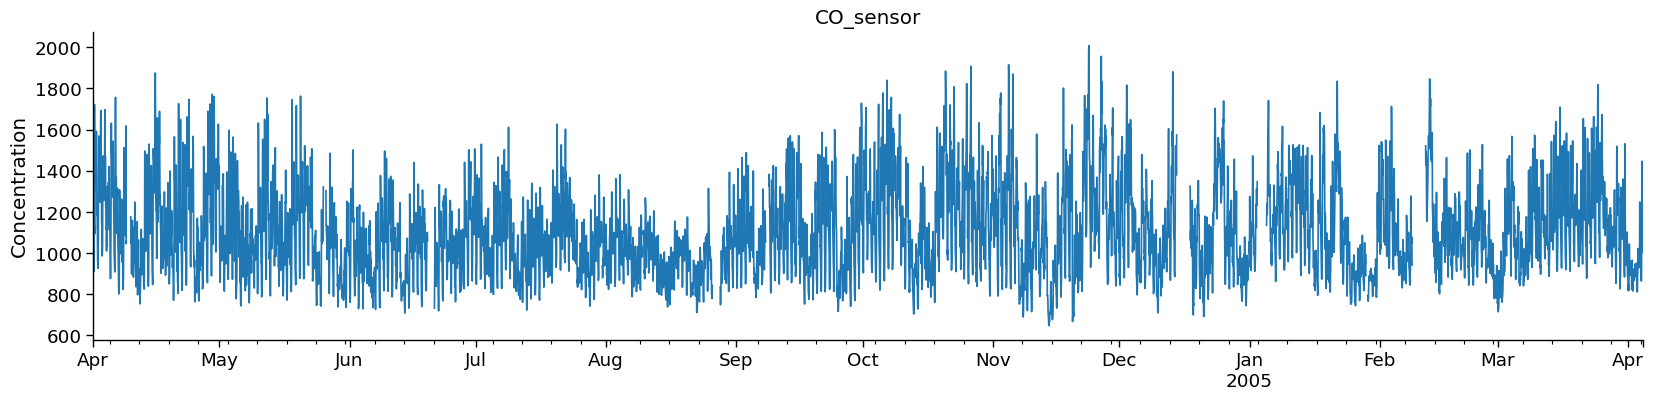

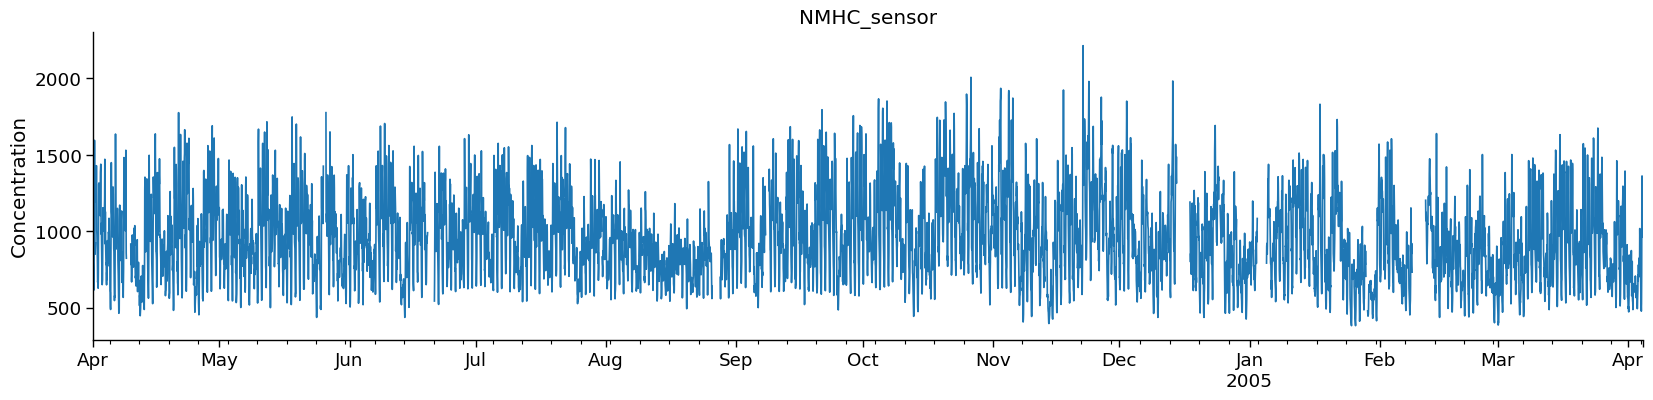

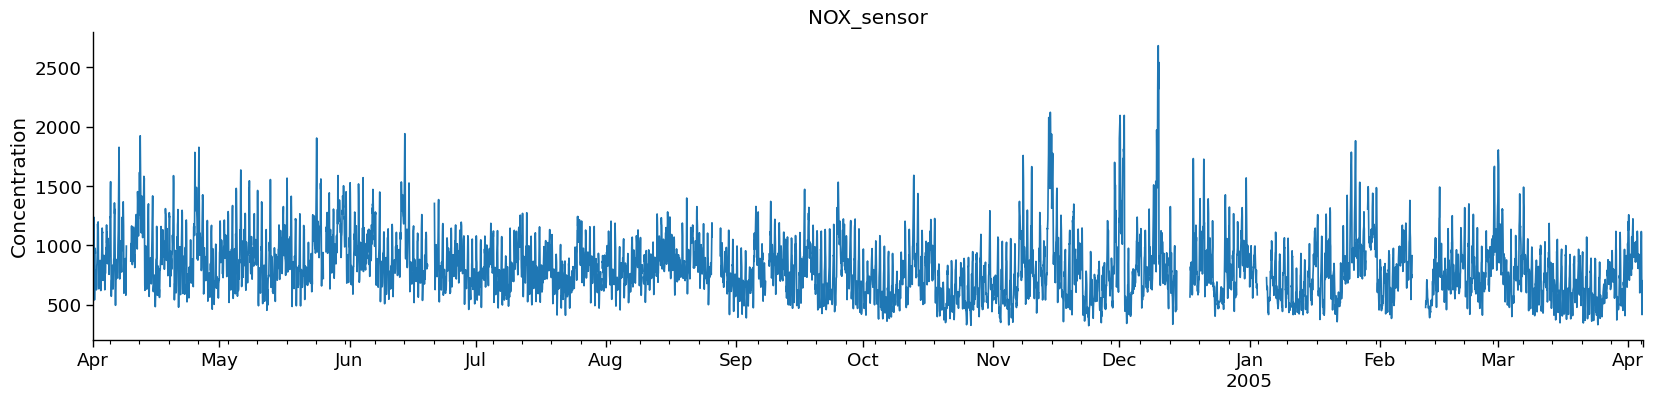

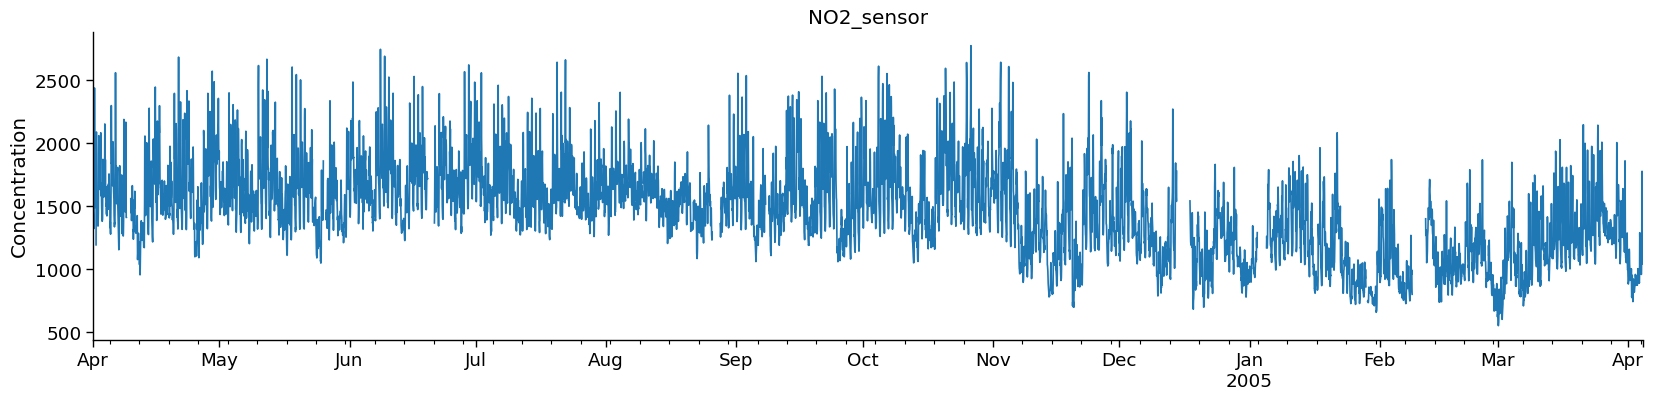

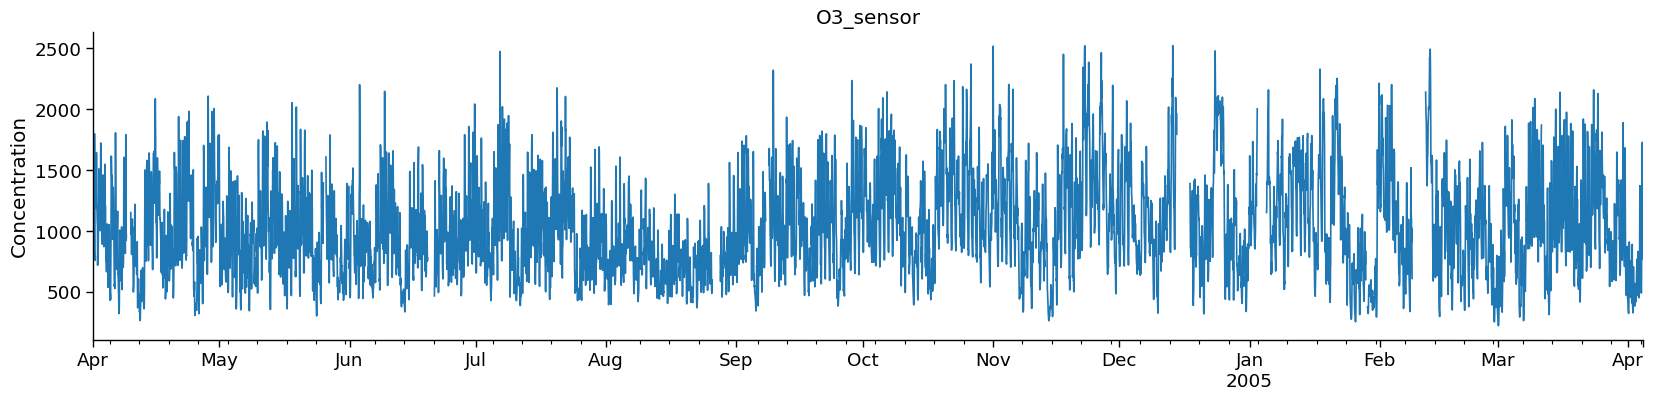

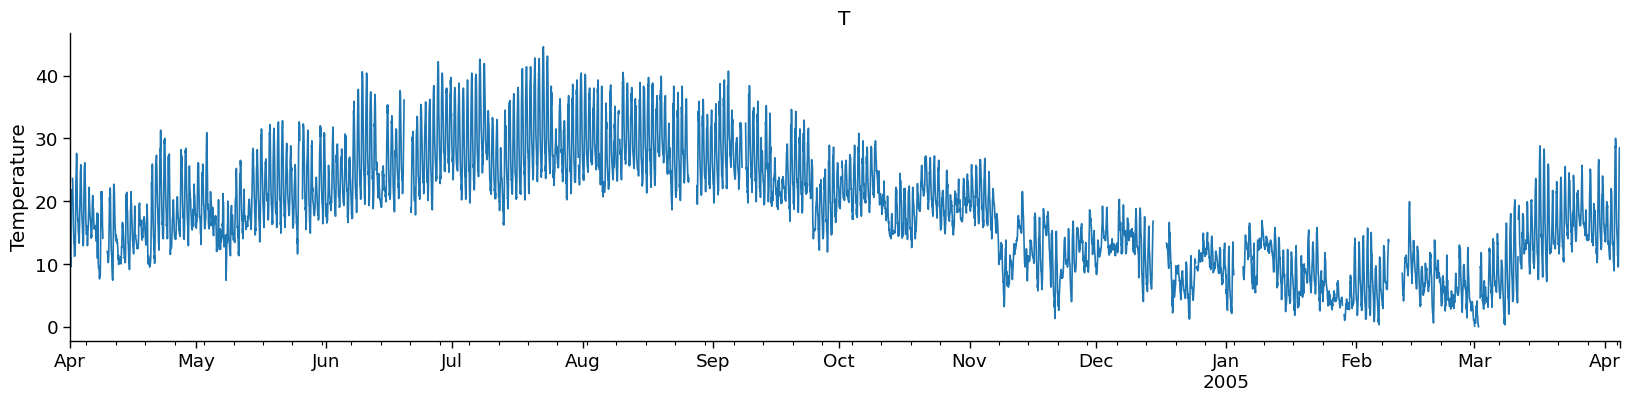

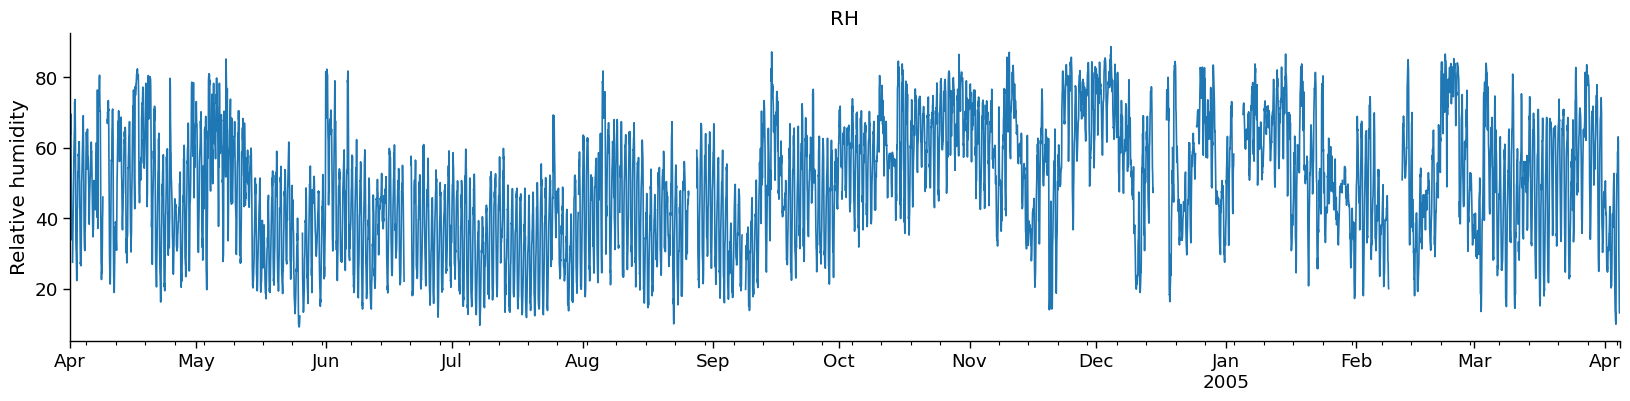

In [9]:
# Plot the time series.
col_by_ylabel = {
    "T": "Temperature",
    "RH": "Relative humidity",
    "AH": "Adjusted humididty",
}

for var in data.columns:
    data[var].plot(figsize=(20, 4))
    plt.title(var)
    ylabel = col_by_ylabel.get(var)
    if ylabel:
        plt.ylabel(ylabel)
    else:
        plt.ylabel("Concentration")
    plt.xlabel("")
    plt.show()

### 1.2) Impute Missing data

In [10]:
data = data.fillna(method="ffill")
# QC
data.isnull().any()

/var/folders/fd/vdpcq4tn1v3fbxg5302hgb980000gq/T/ipykernel_25554/2704496436.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method="ffill")


CO_sensor      False
NMHC_sensor    False
NOX_sensor     False
NO2_sensor     False
O3_sensor      False
T              False
RH             False
dtype: bool

## 2) ACF & PACF: Raw data
The input time series are non-stationary time-series, however we just want to see it.

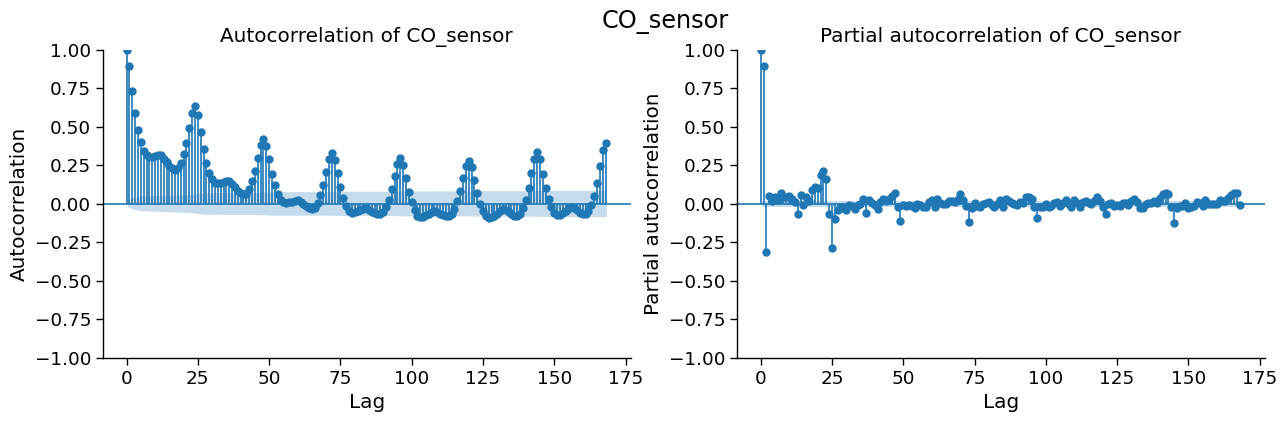

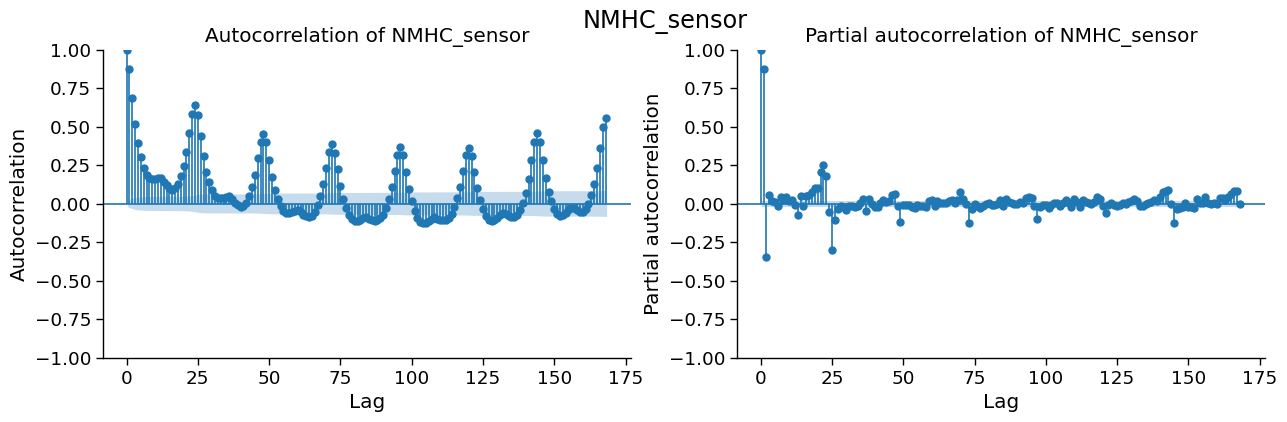

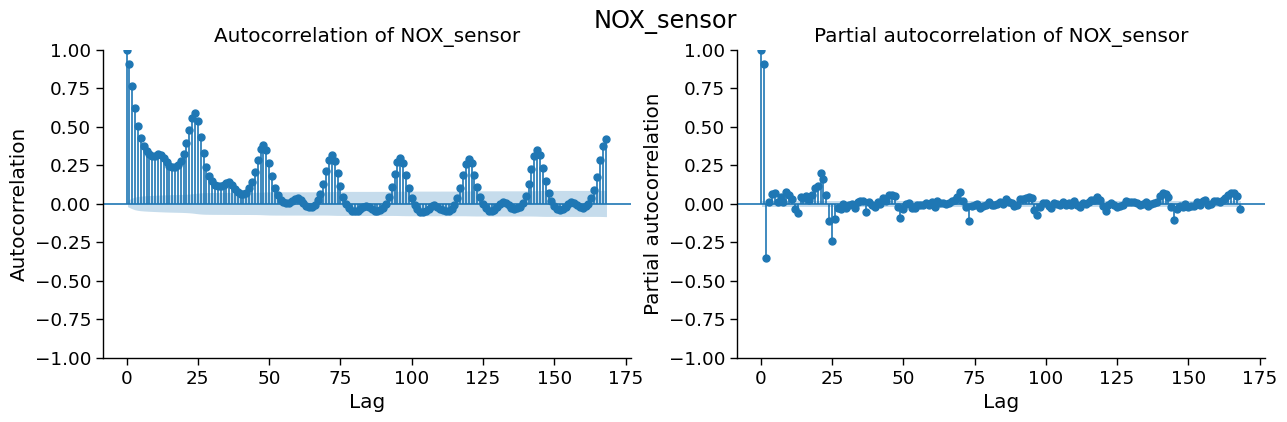

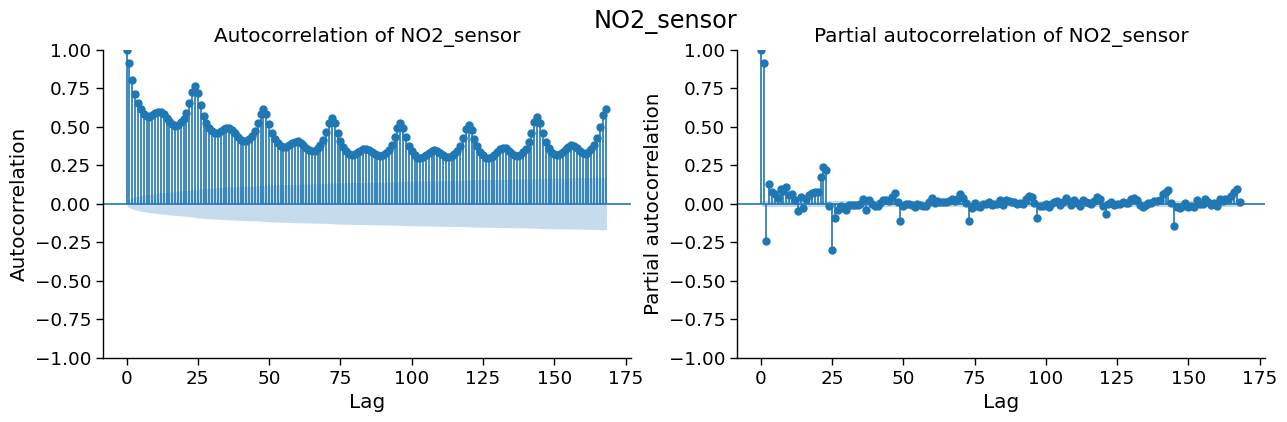

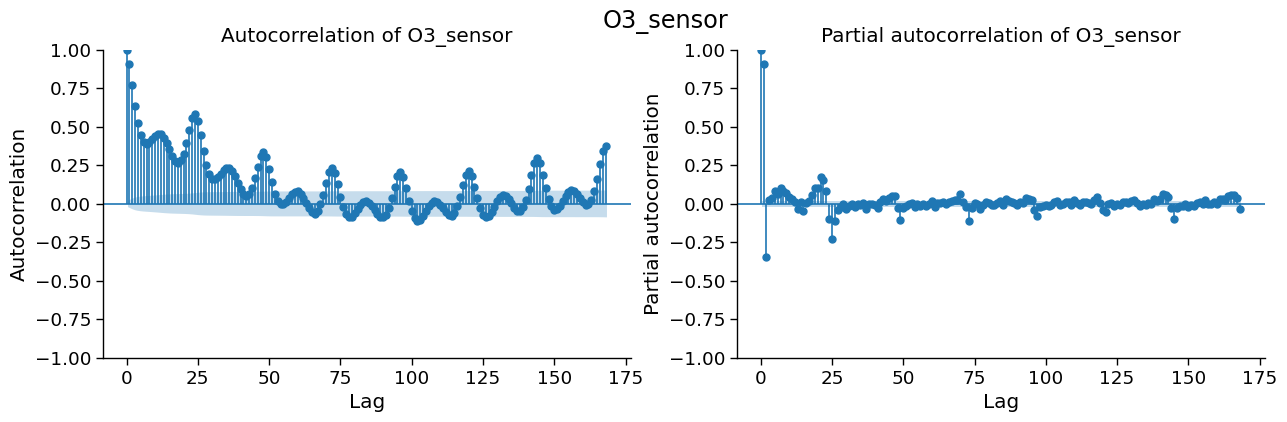

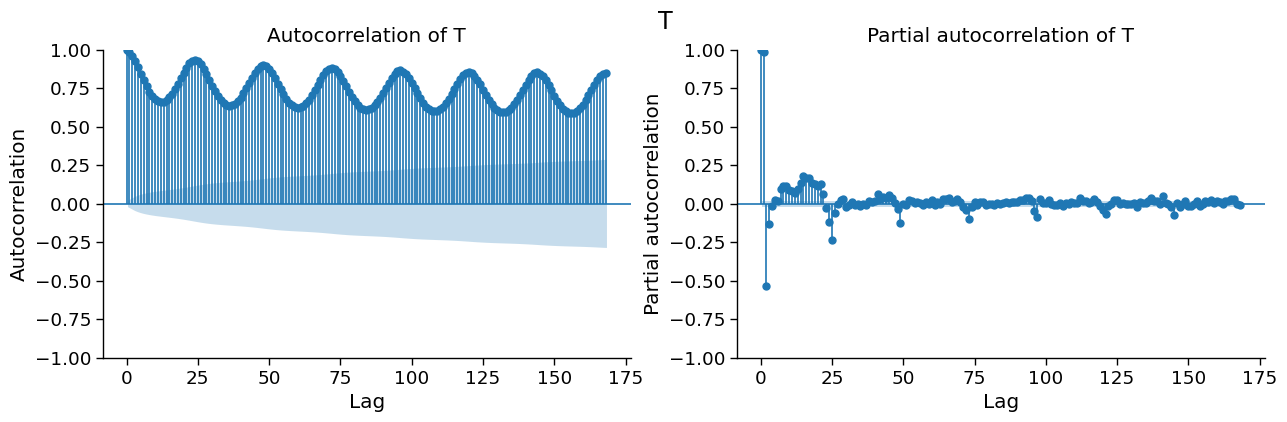

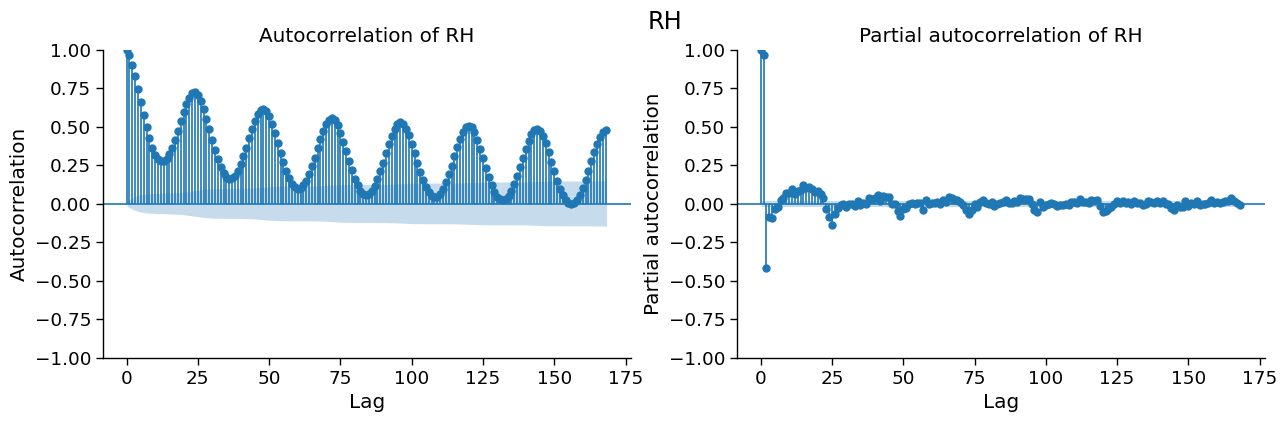

In [12]:
# Let's start lookig at lags upt to 7 days ago.
for col in data.columns:
    fig, ax = plt.subplots(ncols=2, figsize=[15, 4])
    plot_acf(data[col], lags=7 * 24, ax=ax[0])
    ax[0].set_title(f"Autocorrelation of {col}")
    ax[0].set_xlabel("Lag")
    ax[0].set_ylabel("Autocorrelation")
    plot_pacf(data[col], lags=7 * 24, ax=ax[1], method="ywmle")
    ax[1].set_title(f"Partial autocorrelation of {col}")
    ax[1].set_xlabel("Lag")
    ax[1].set_ylabel("Partial autocorrelation")
    fig.suptitle(col)

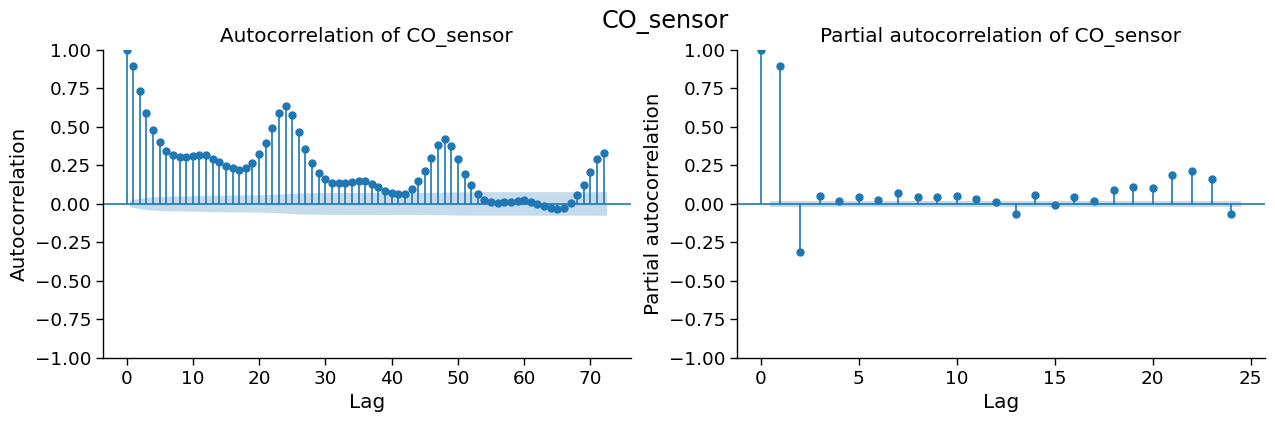

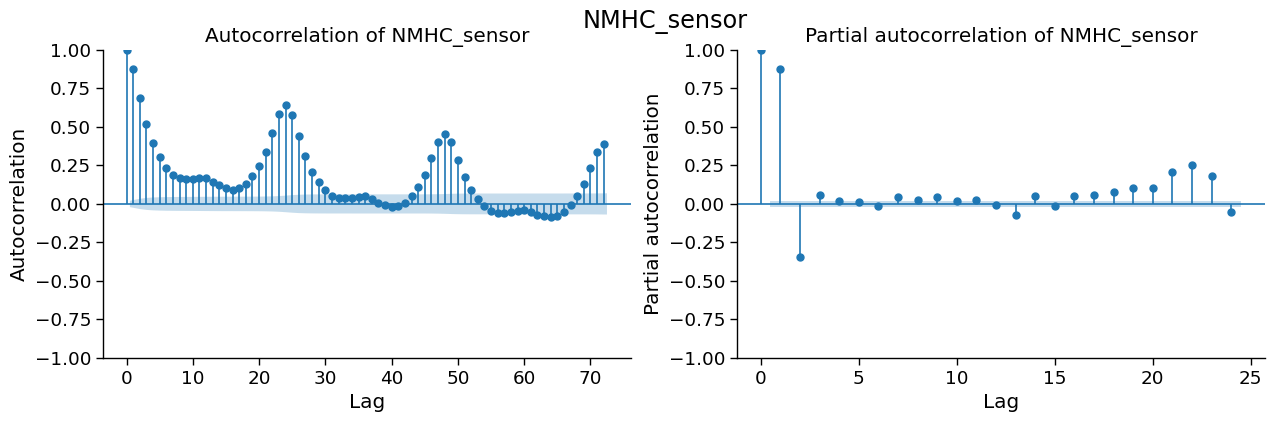

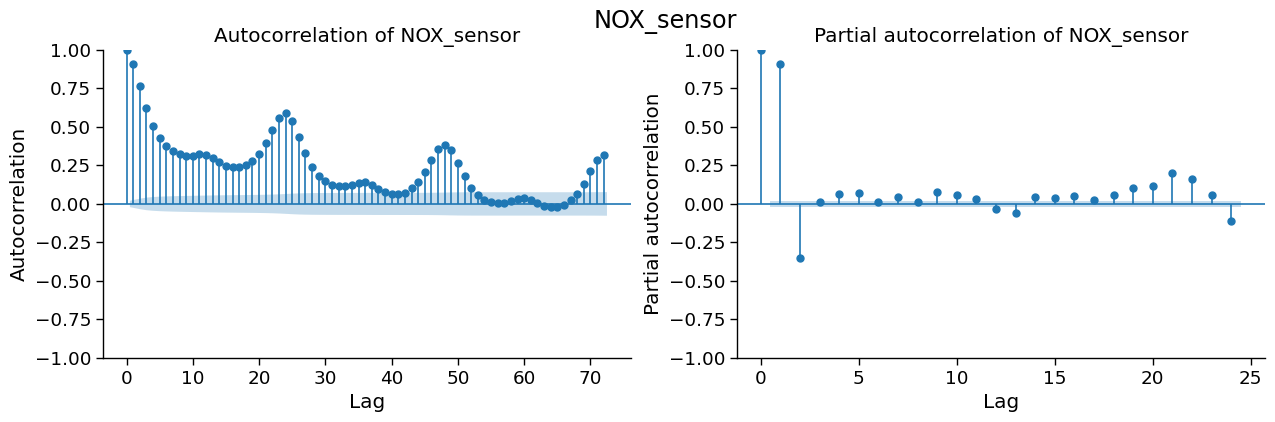

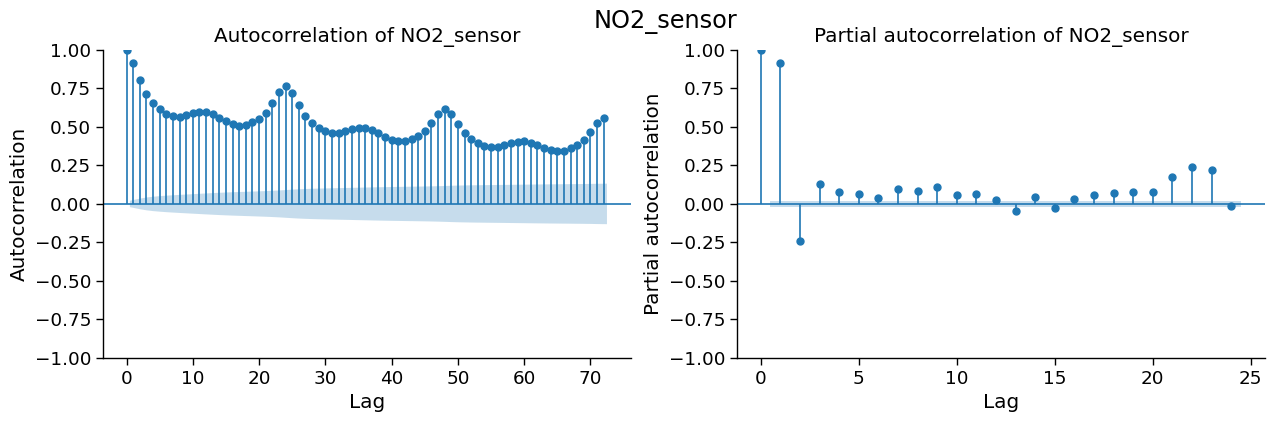

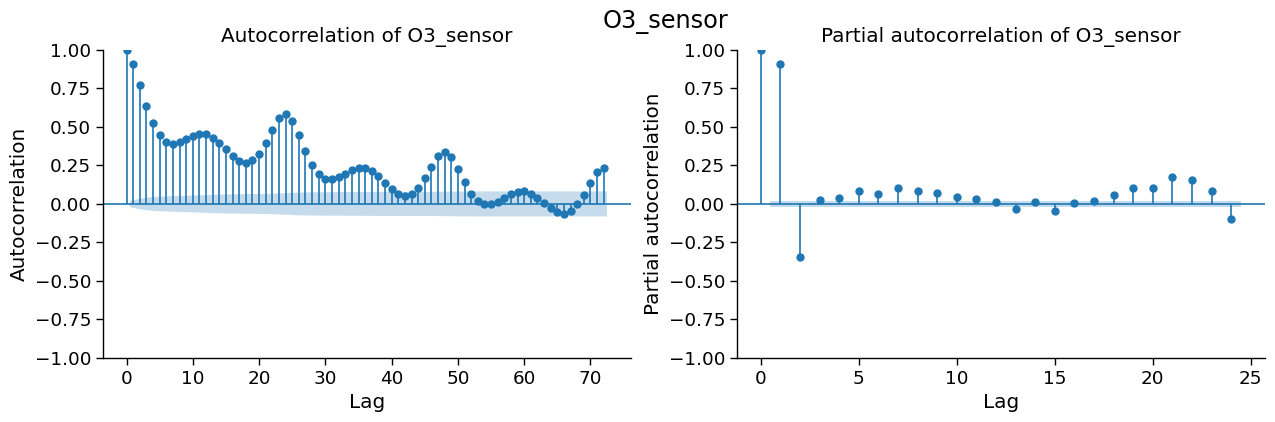

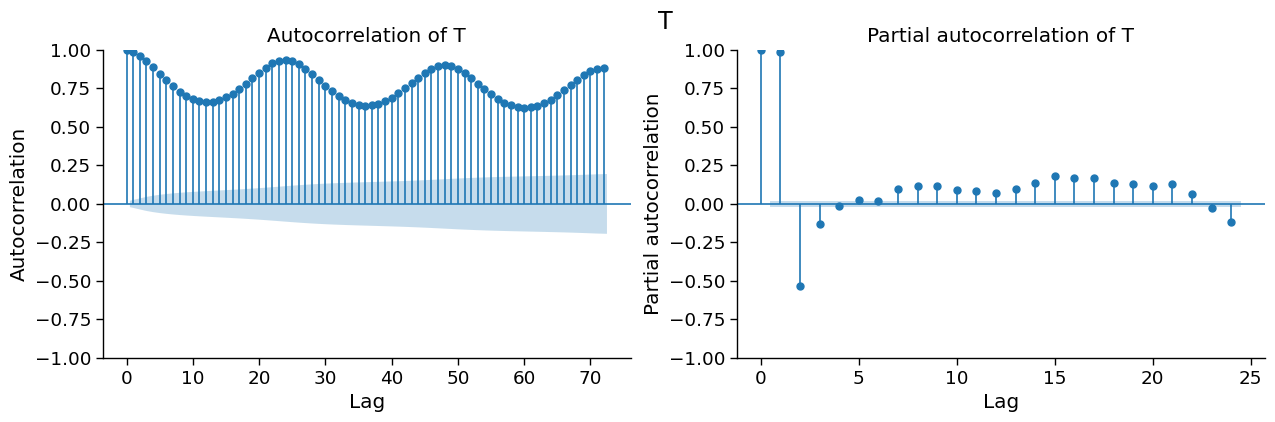

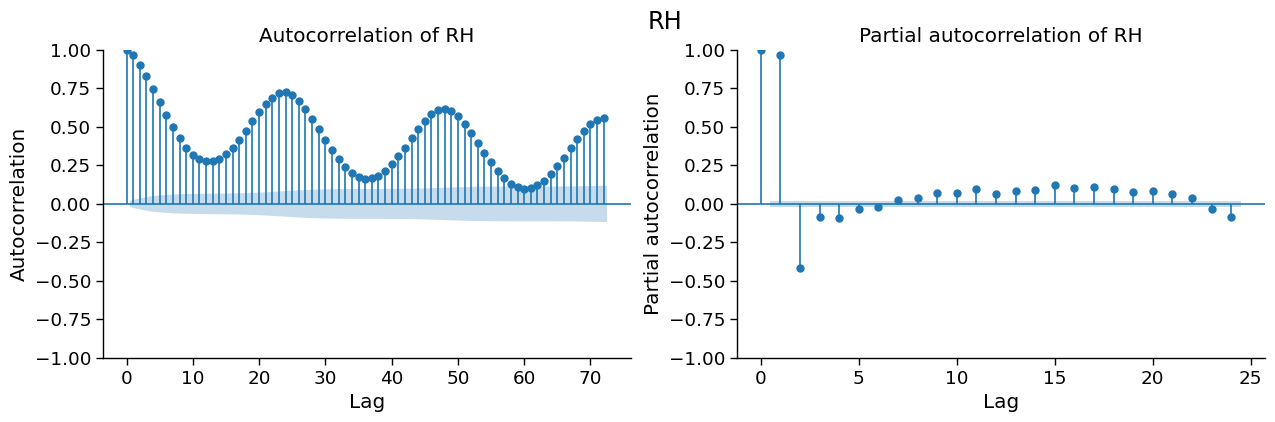

In [14]:
# The ACF shows periodic peaks at multiples of 24 hours. Some sensors also show  peaks  at  12 hours. 
# This is corroborated with the PACF showing a peak at 24 hours.
# Let's zoom in
for col in data.columns:
    fig, ax = plt.subplots(ncols=2, figsize=[15, 4])
    plot_acf(data[col].dropna(), lags=3 * 24, ax=ax[0])
    ax[0].set_title(f"Autocorrelation of {col}")
    ax[0].set_xlabel("Lag")
    ax[0].set_ylabel("Autocorrelation")
    plot_pacf(data[col].dropna(), lags=1 * 24, ax=ax[1], method="ywmle")
    ax[1].set_title(f"Partial autocorrelation of {col}")
    ax[1].set_xlabel("Lag")
    ax[1].set_ylabel("Partial autocorrelation")
    fig.suptitle(col)

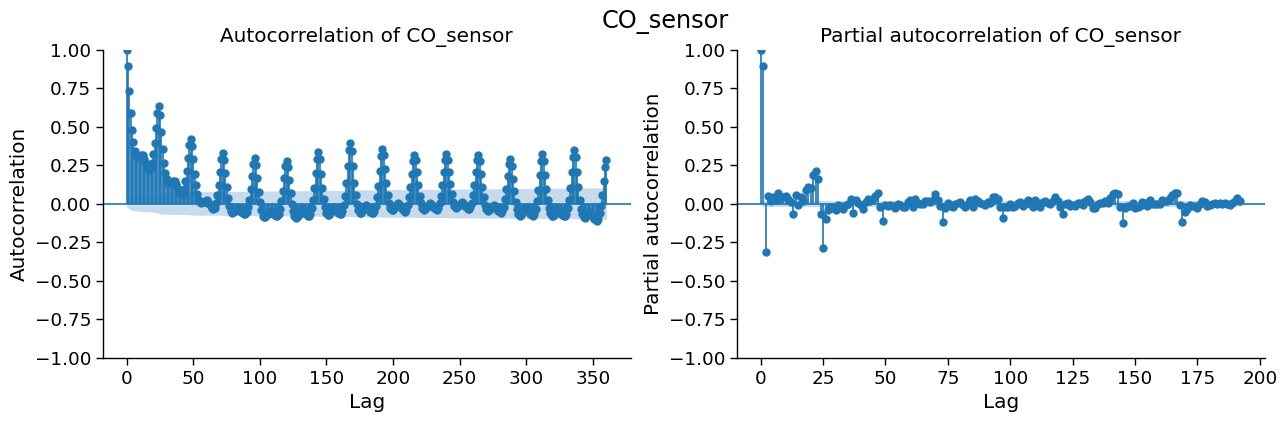

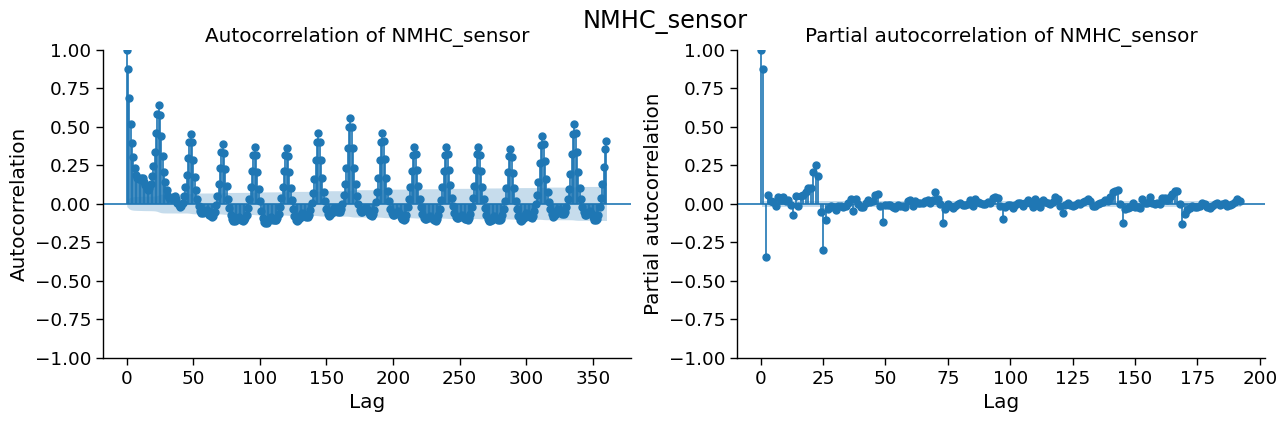

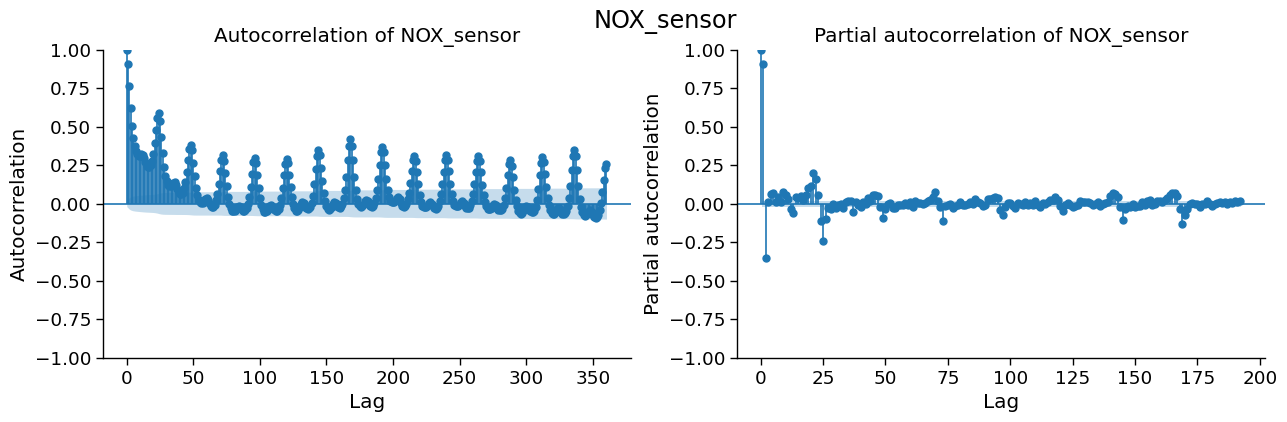

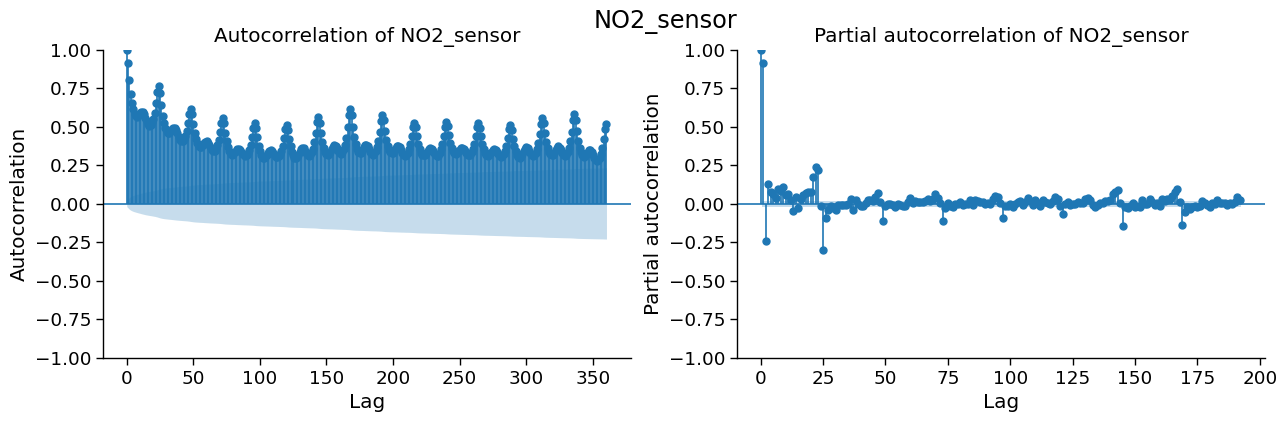

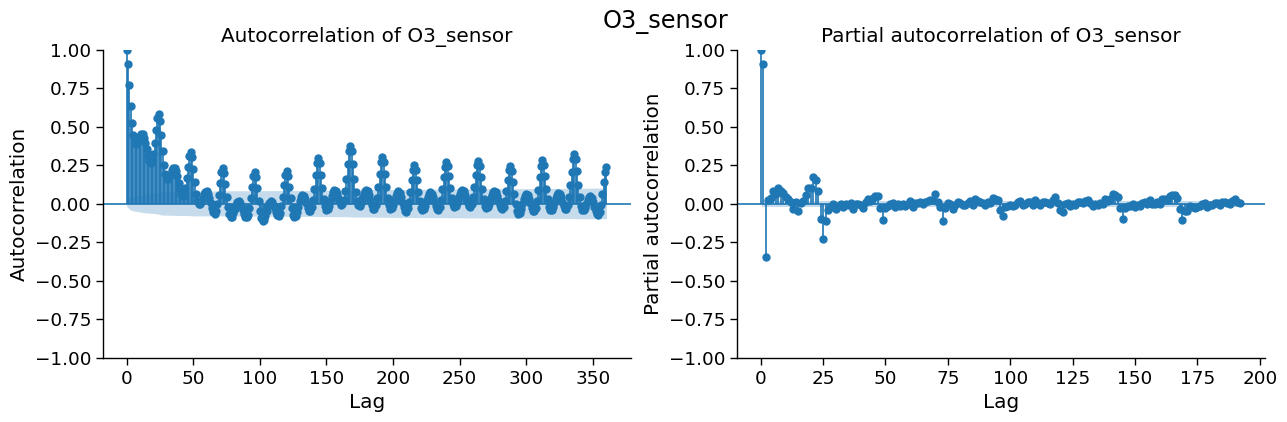

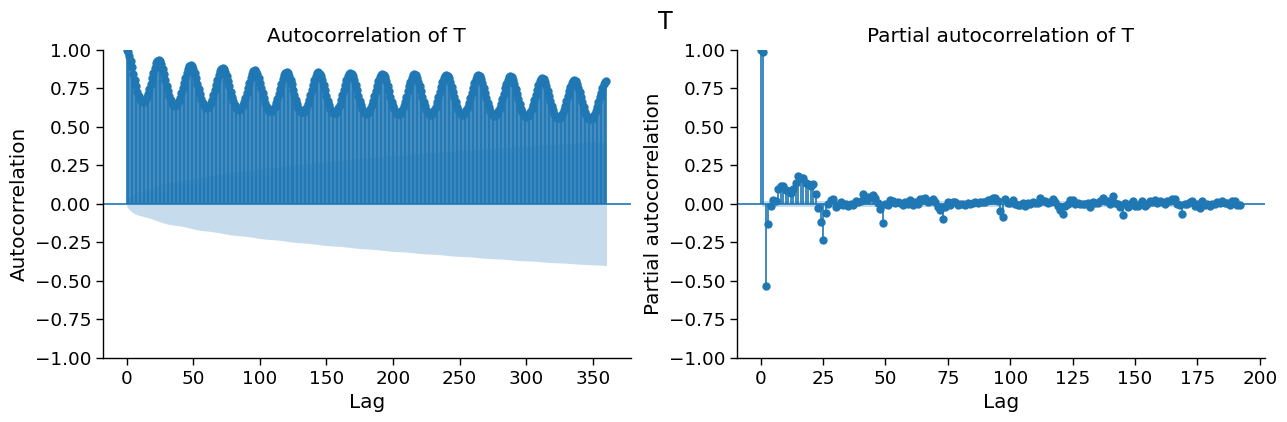

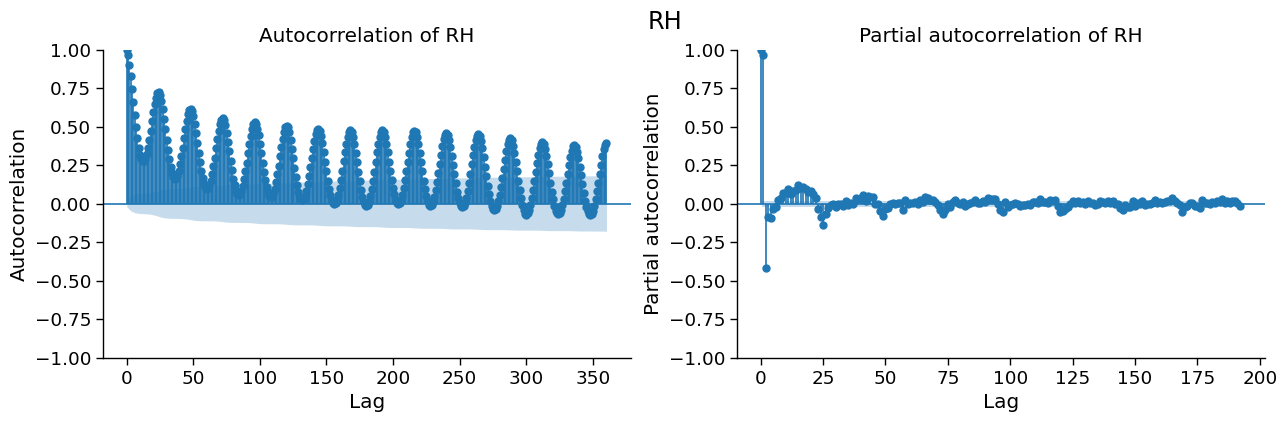

In [16]:
# Weekly seasonality (168 hours = 7*24)
for col in data.columns:
    fig, ax = plt.subplots(ncols=2, figsize=[15, 4])
    plot_acf(data[col].dropna(), lags=15 * 24, ax=ax[0])
    ax[0].set_title(f"Autocorrelation of {col}")
    ax[0].set_xlabel("Lag")
    ax[0].set_ylabel("Autocorrelation")
    plot_pacf(data[col].dropna(), lags=8 * 24, ax=ax[1], method="ywmle")
    ax[1].set_title(f"Partial autocorrelation of {col}")
    ax[1].set_xlabel("Lag")
    ax[1].set_ylabel("Partial autocorrelation")
    fig.suptitle(col)

So far from looking at the ACF and PACF we would use: 
* **Recent lags**: (1 or 2 hours)
* **Seasonal lags**: (12, 24, and 168 hours). 

This agrees with everything seen so far in the previous two notebooks using domain knowledge and a feature selection method.

## 3) ACF & PACF: De-trend & de-seasonalise data
Using `MSTL`

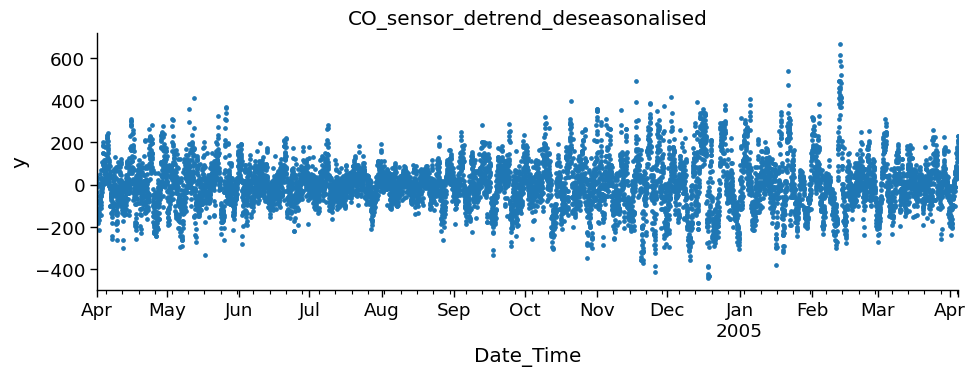

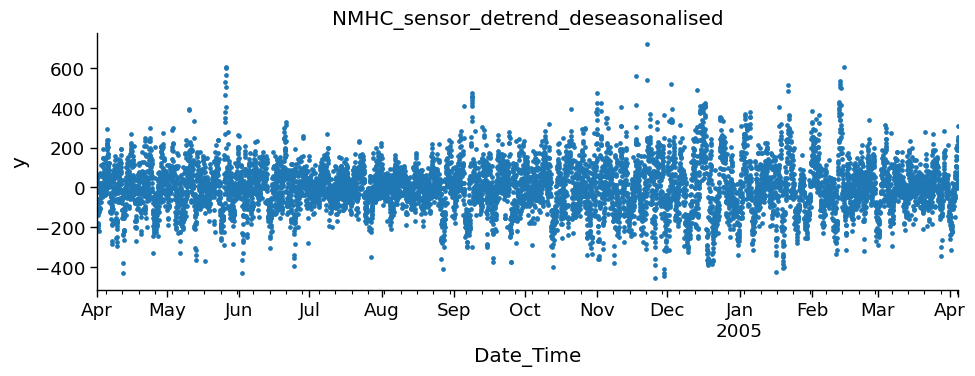

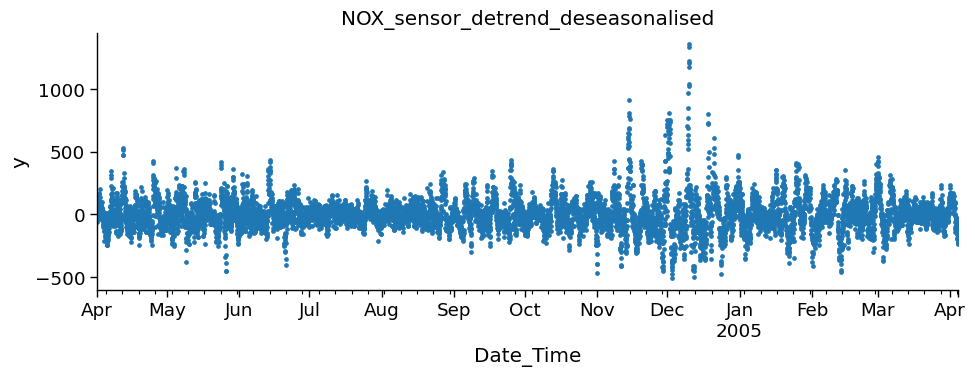

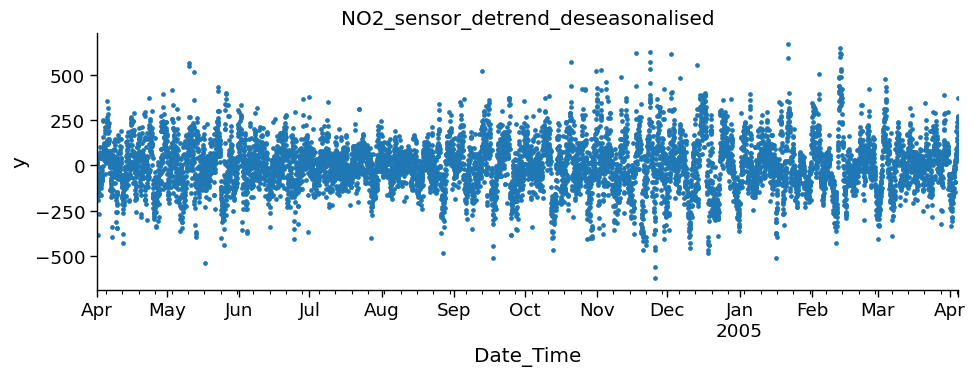

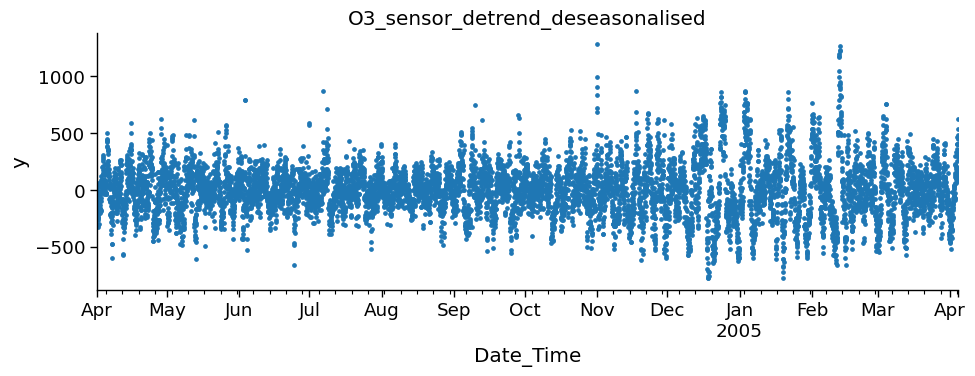

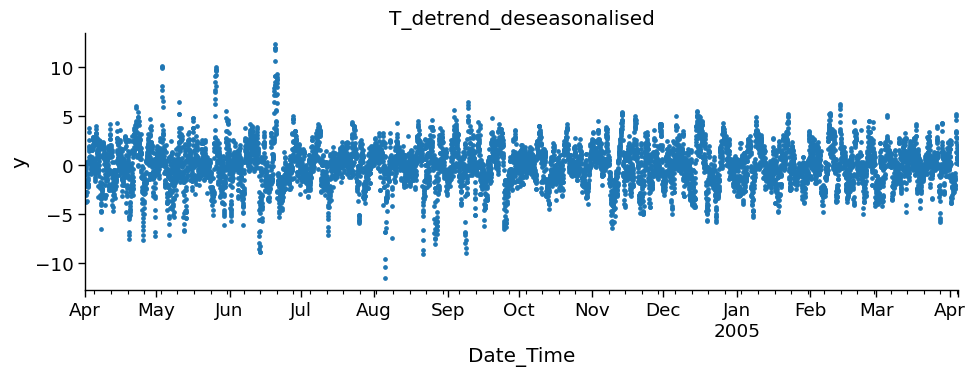

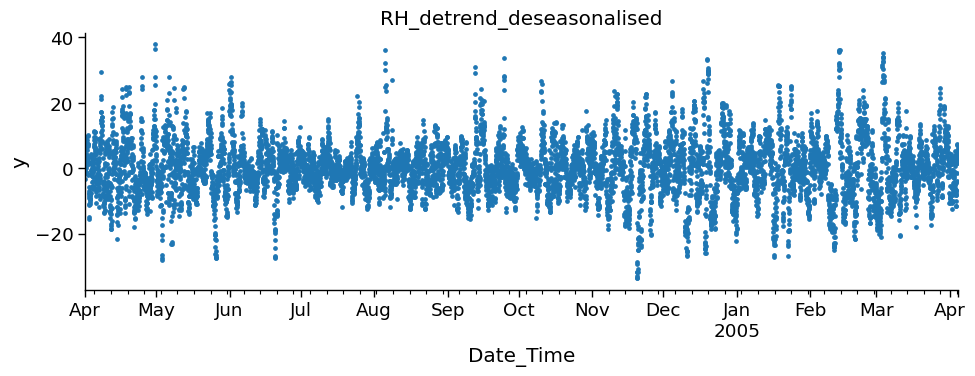

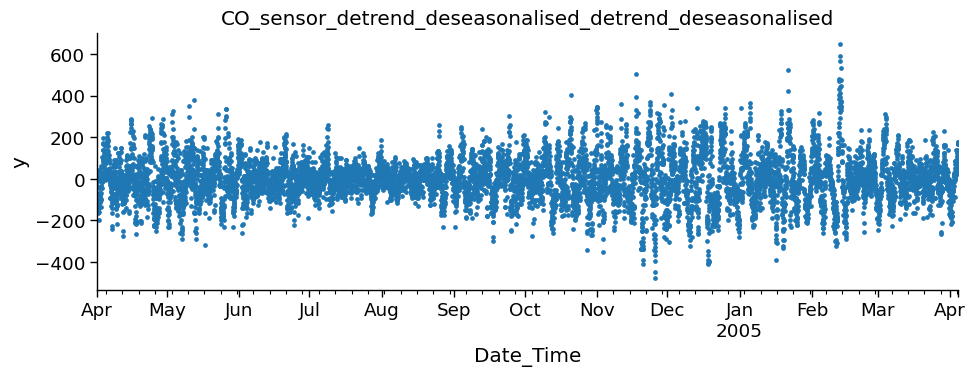

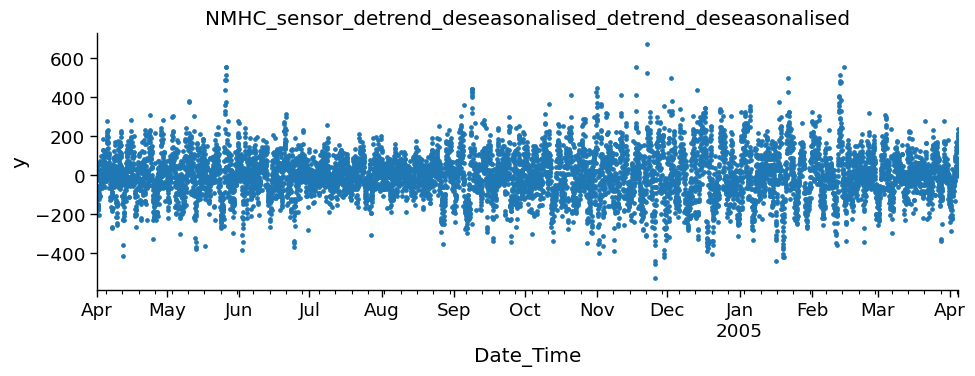

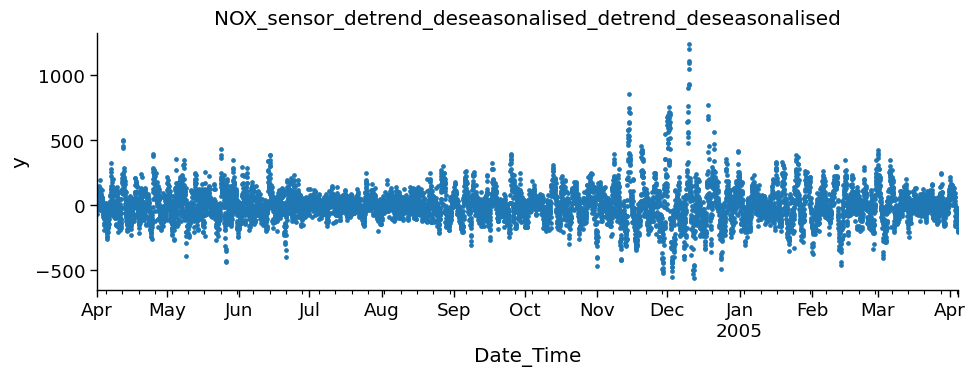

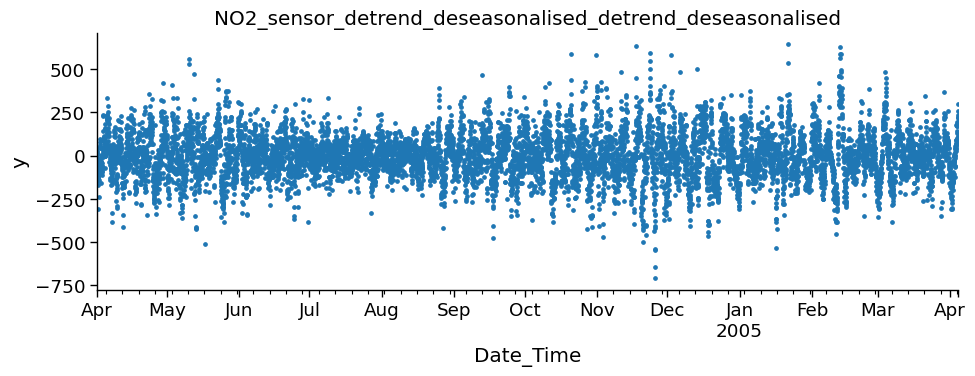

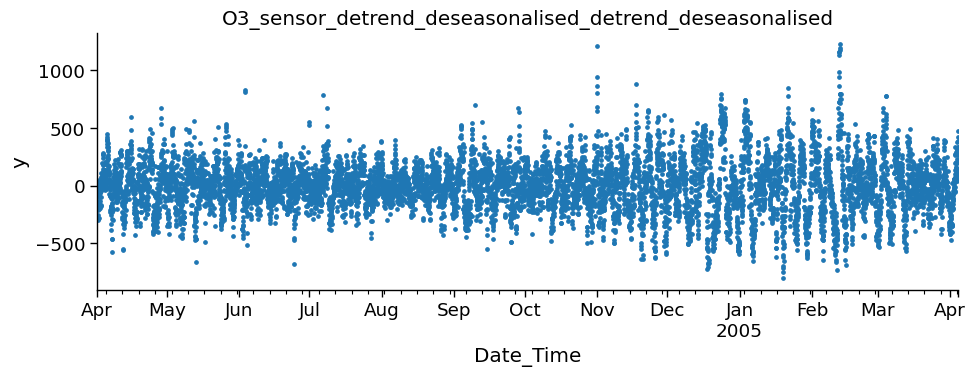

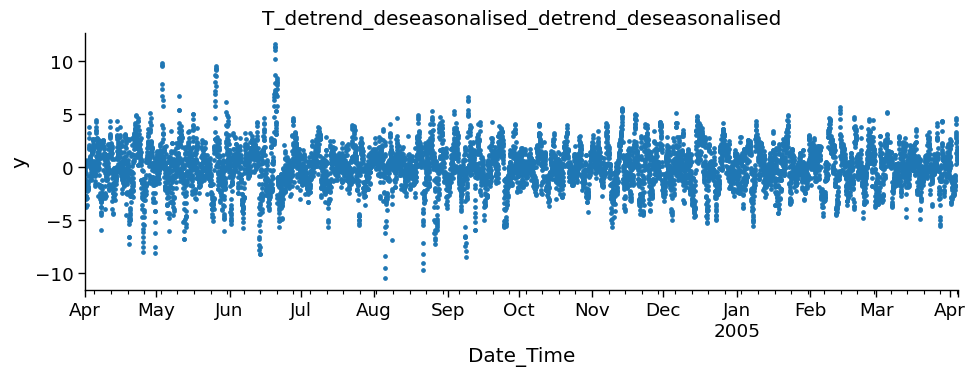

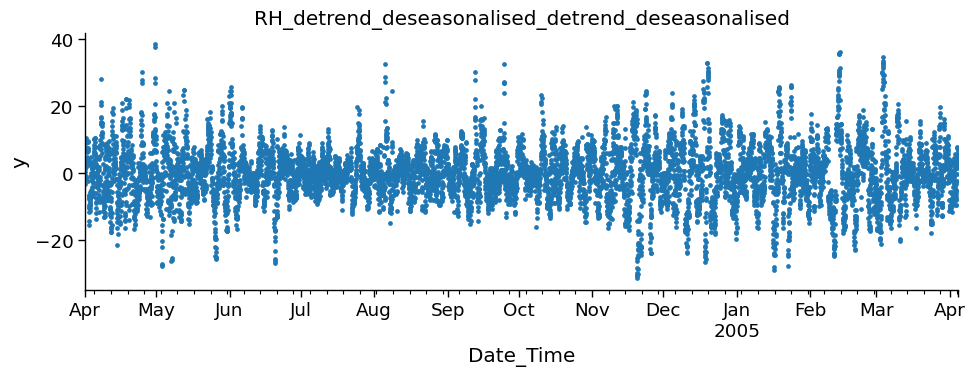

In [18]:
for col in data.columns:
    res = MSTL(
        endog=data[col],
        periods=[24, 24 * 7],  # daily and weekly seasonality
    ).fit()
    fig, ax = plt.subplots(ncols=1, figsize=[10, 4])
    res.resid.plot(ax=ax, marker=".", linestyle="None")
    ax.set_ylabel("y")
    col_name = col + "_detrend_deseasonalised"
    ax.set_title(col_name)
    data[col_name] = res.resid
    plt.tight_layout()

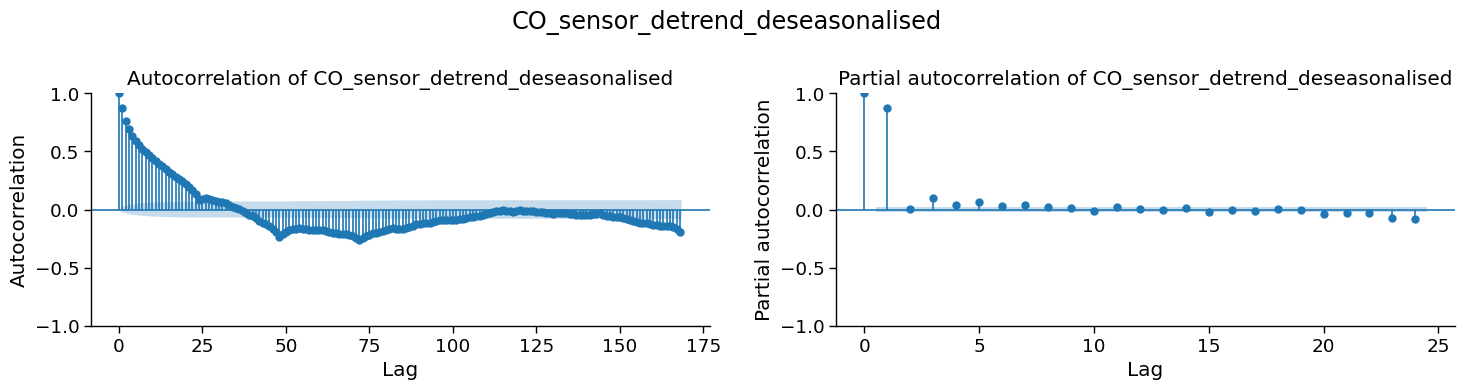

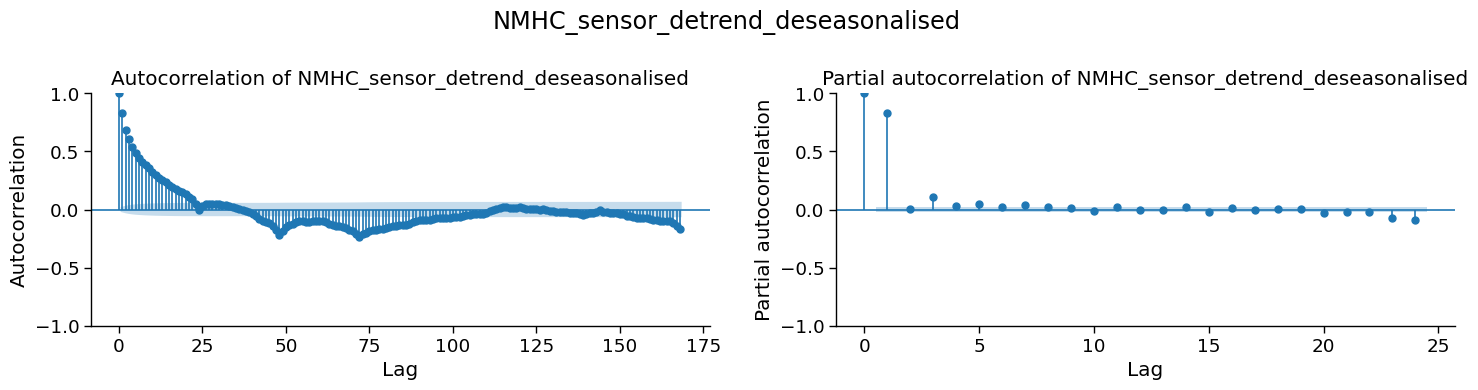

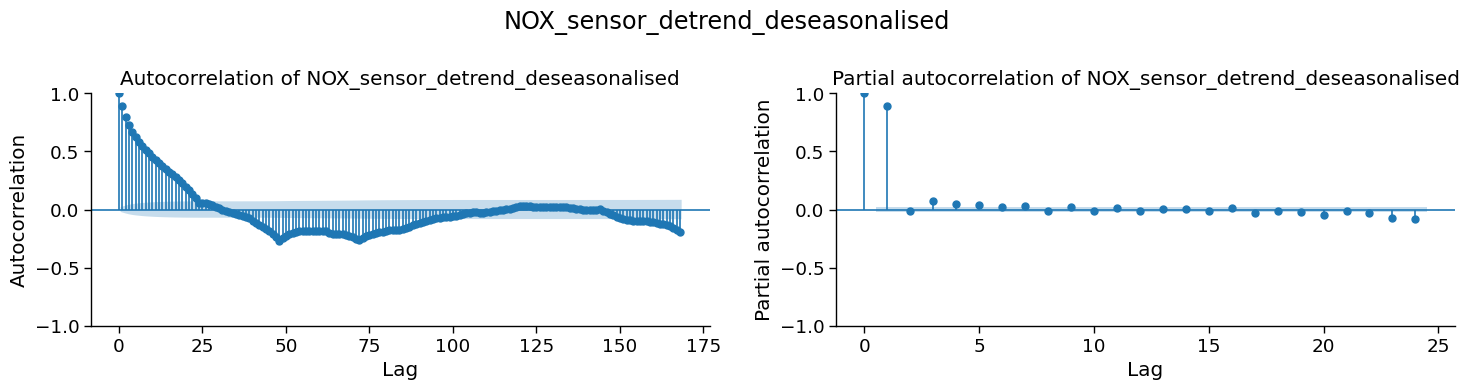

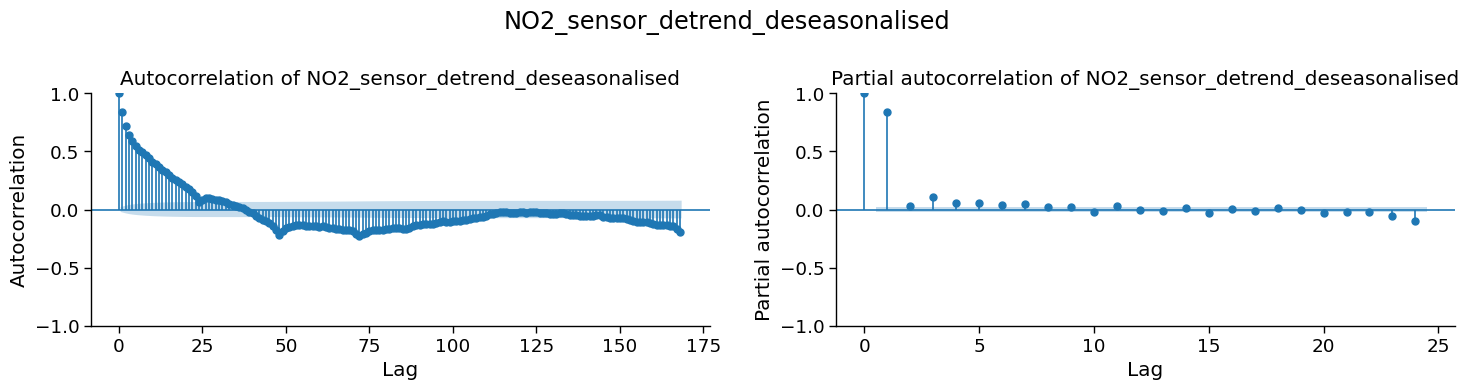

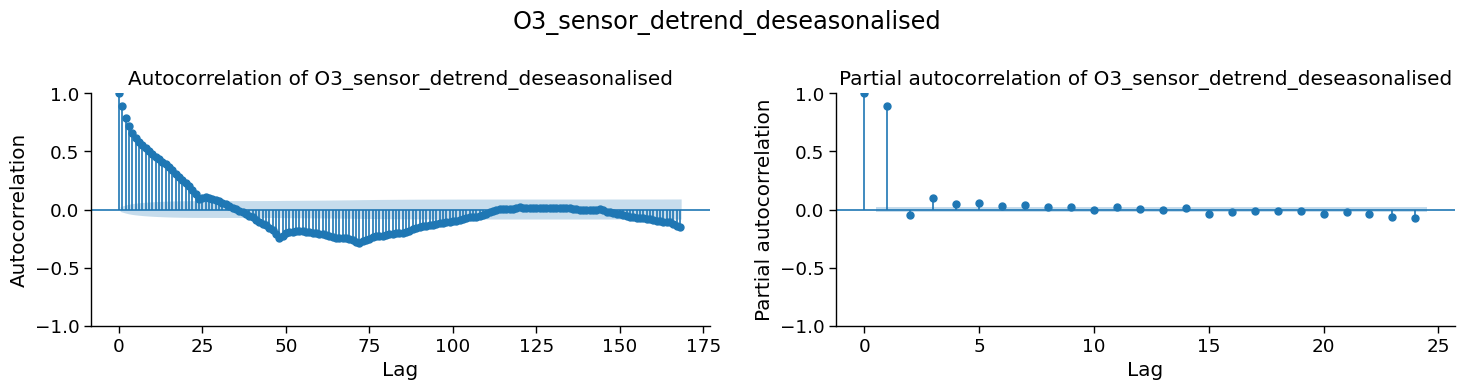

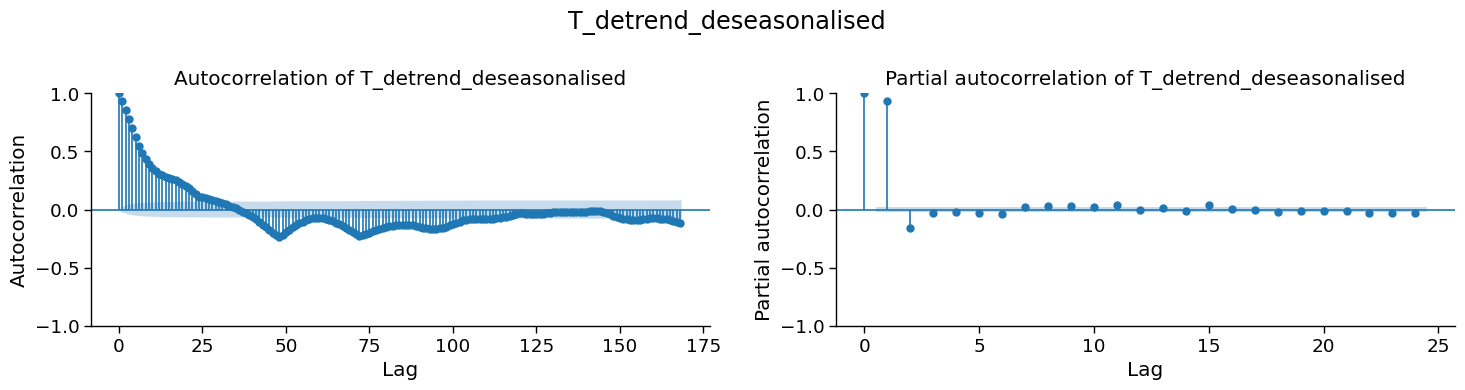

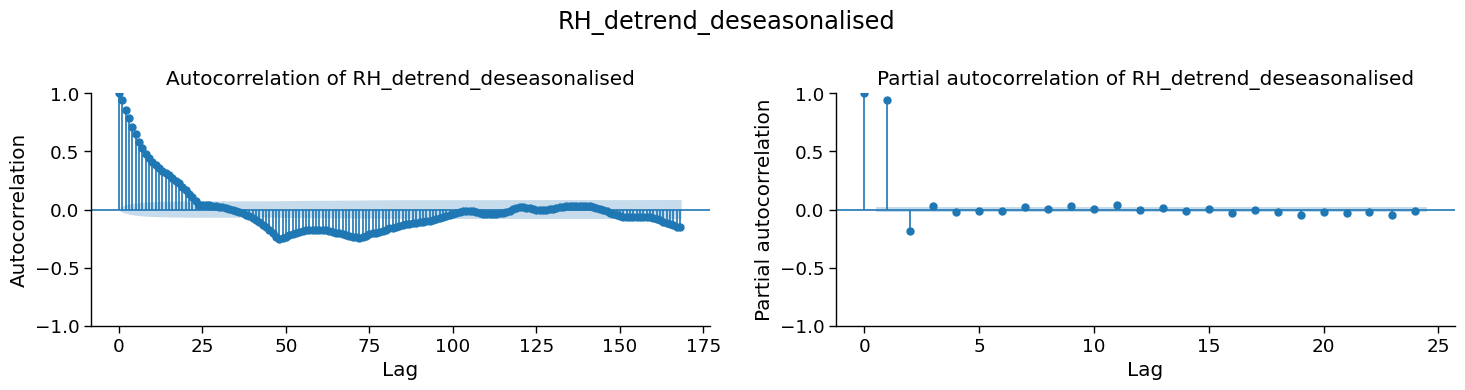

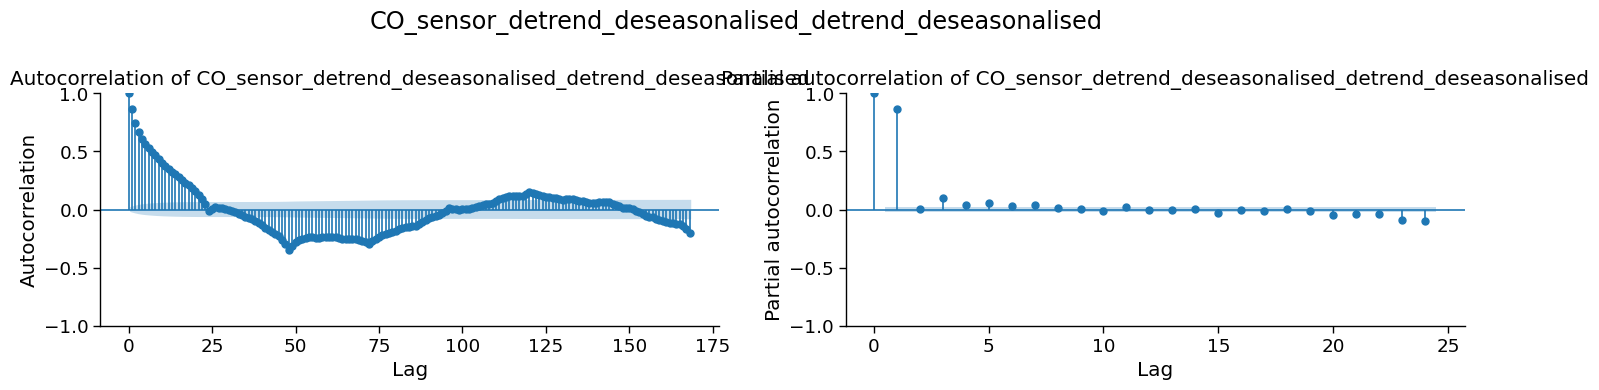

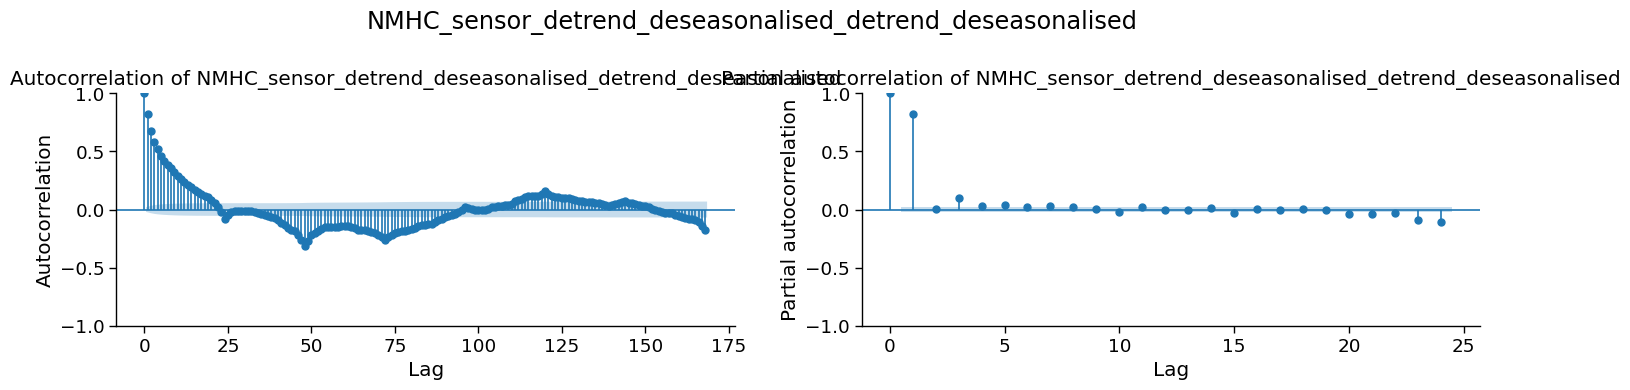

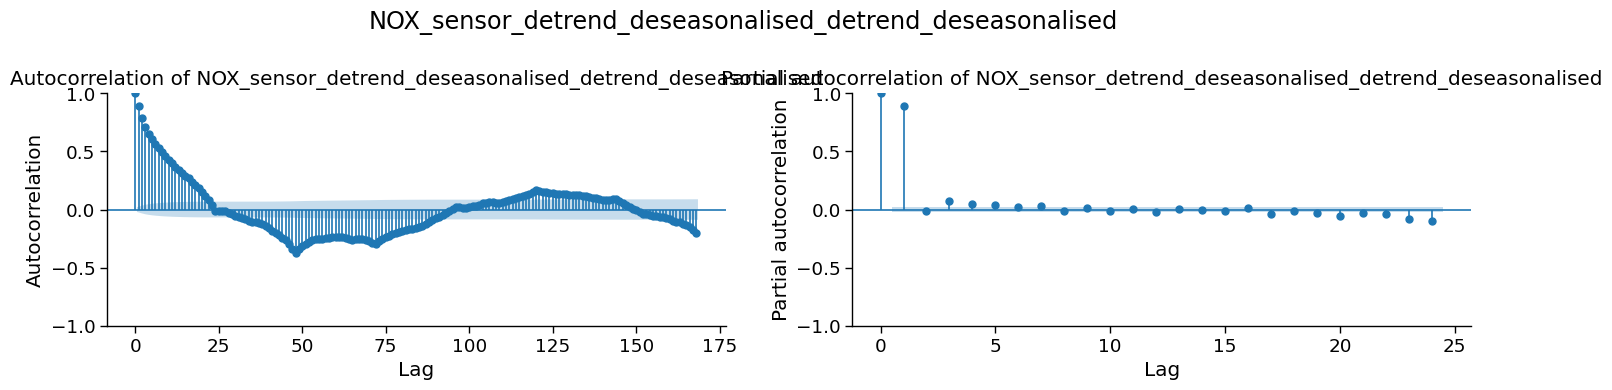

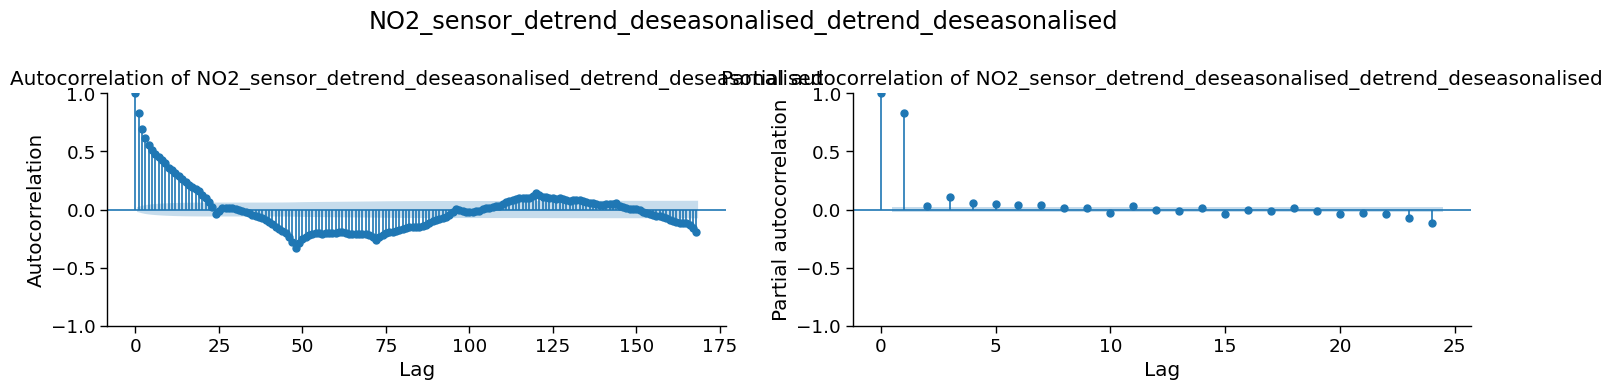

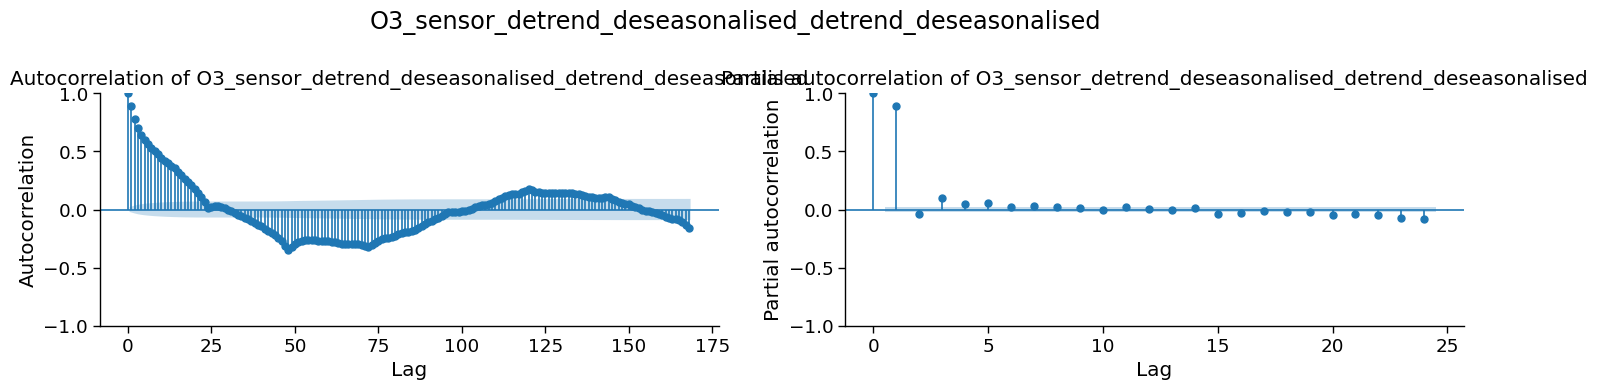

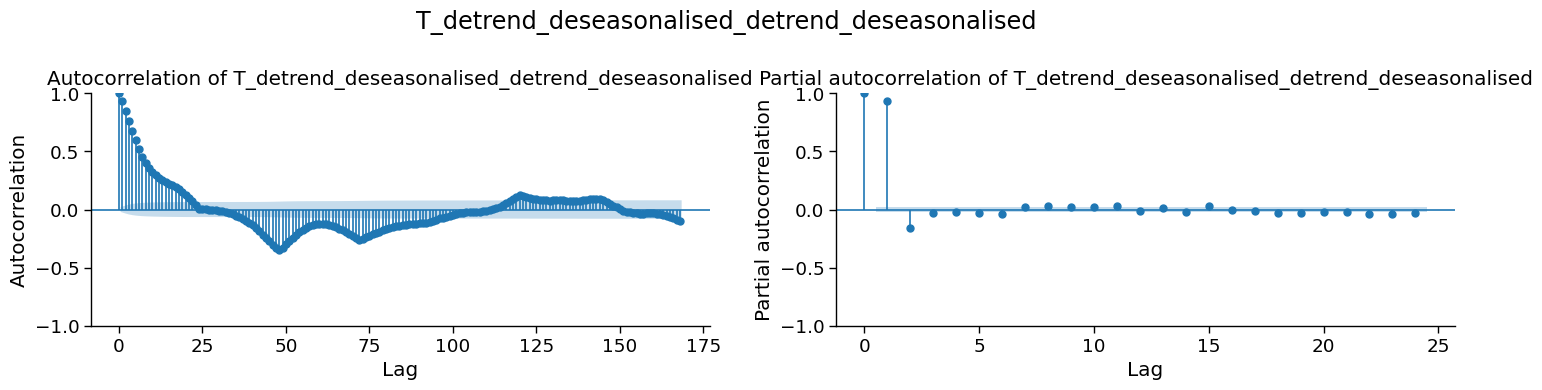

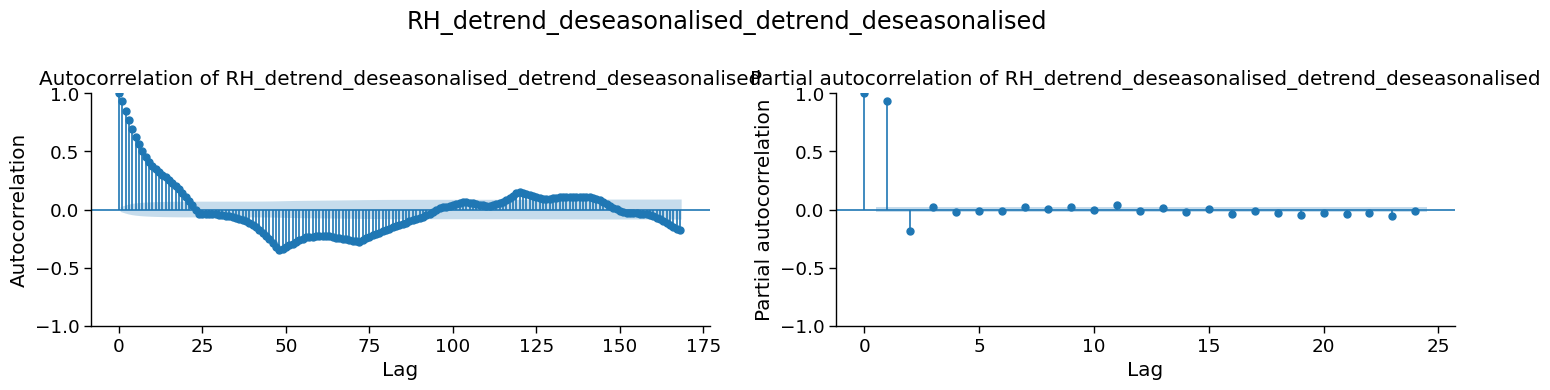

In [19]:
for col in [col for col in data.columns if "detrend" in col]:
    fig, ax = plt.subplots(ncols=2, figsize=[15, 4])
    plot_acf(data[col].dropna(), lags=7 * 24, ax=ax[0])
    ax[0].set_title(f"Autocorrelation of {col}")
    ax[0].set_xlabel("Lag")
    ax[0].set_ylabel("Autocorrelation")
    plot_pacf(data[col].dropna(), lags=1 * 24, ax=ax[1], method="ywmle")
    ax[1].set_title(f"Partial autocorrelation of {col}")
    ax[1].set_xlabel("Lag")
    ax[1].set_ylabel("Partial autocorrelation")
    fig.suptitle(col)
    plt.tight_layout()

## 4) Cross-correlation function (CCF)
Let's see if there is any cross-correlation between any of the variables and `NO2_sensor`.

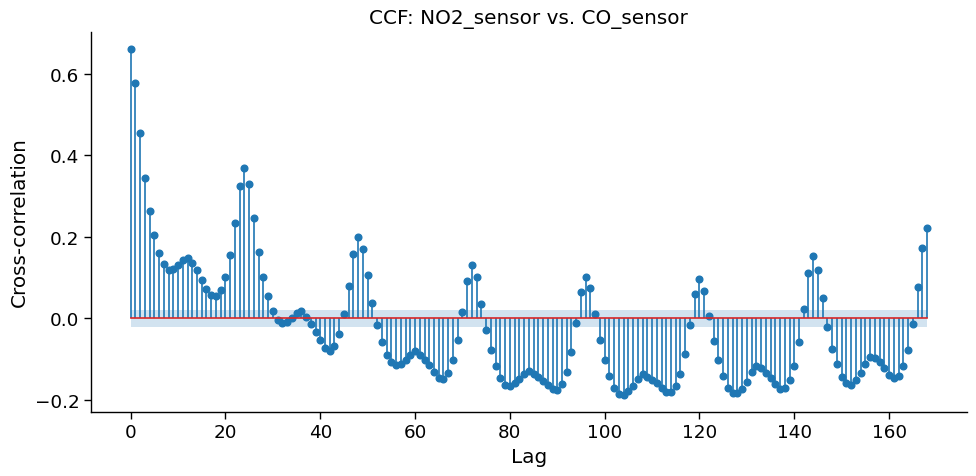

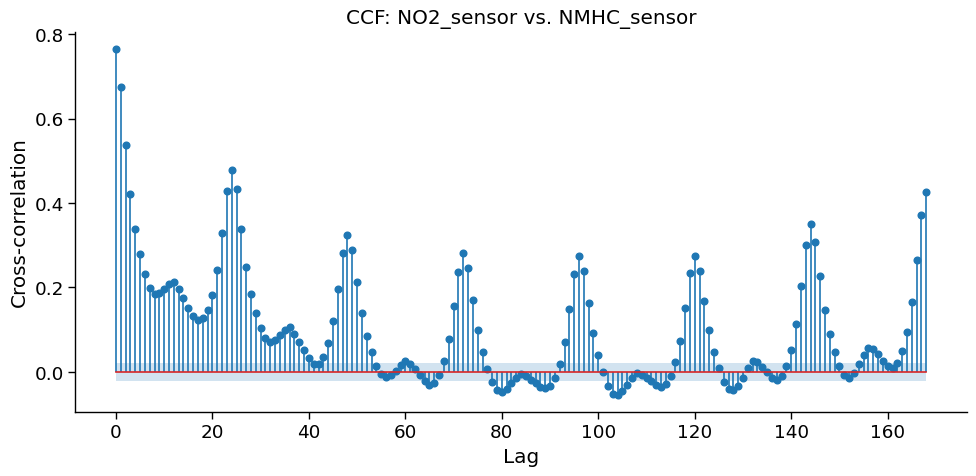

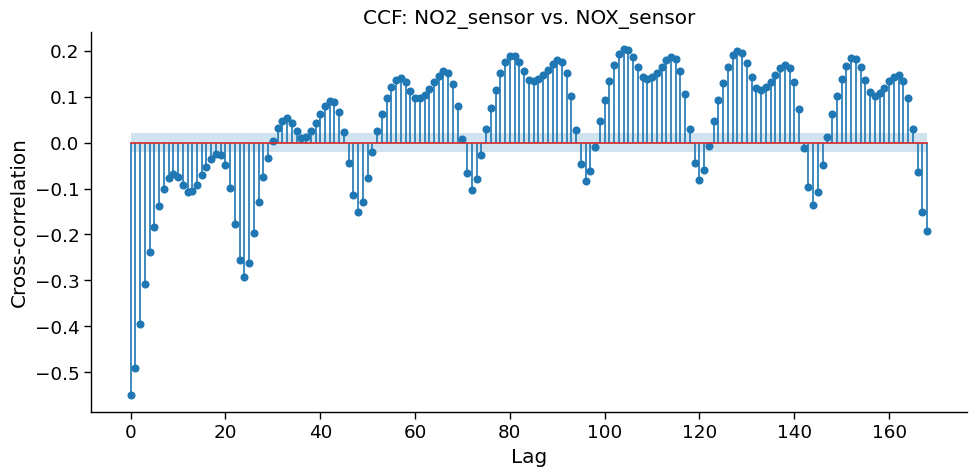

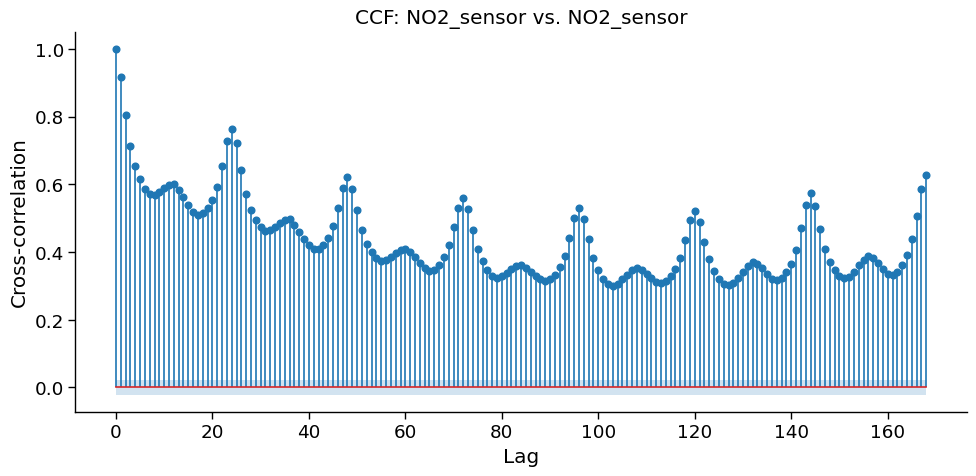

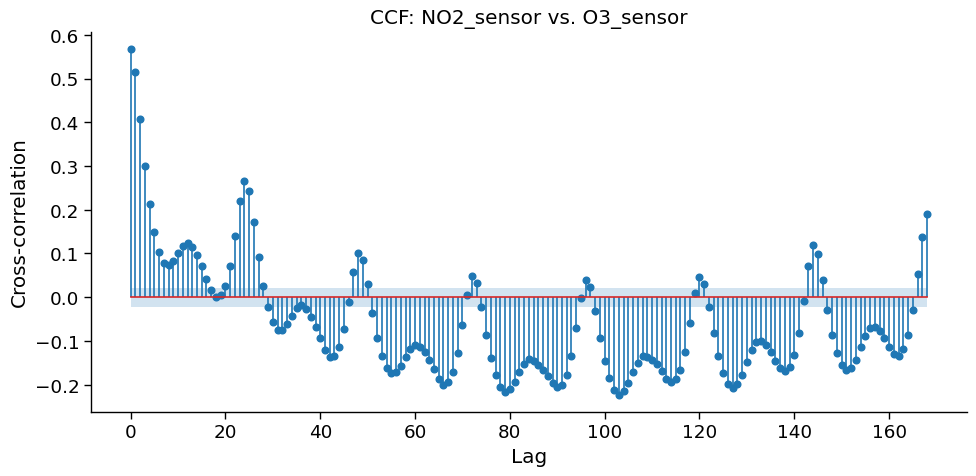

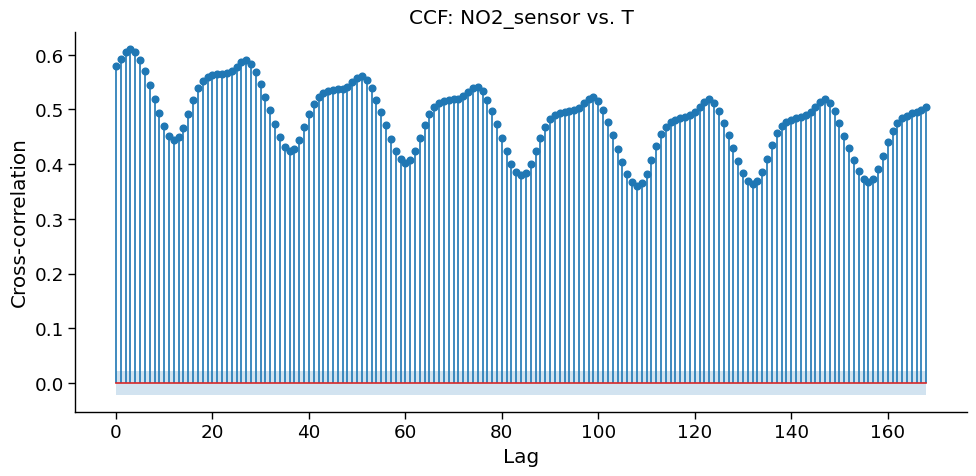

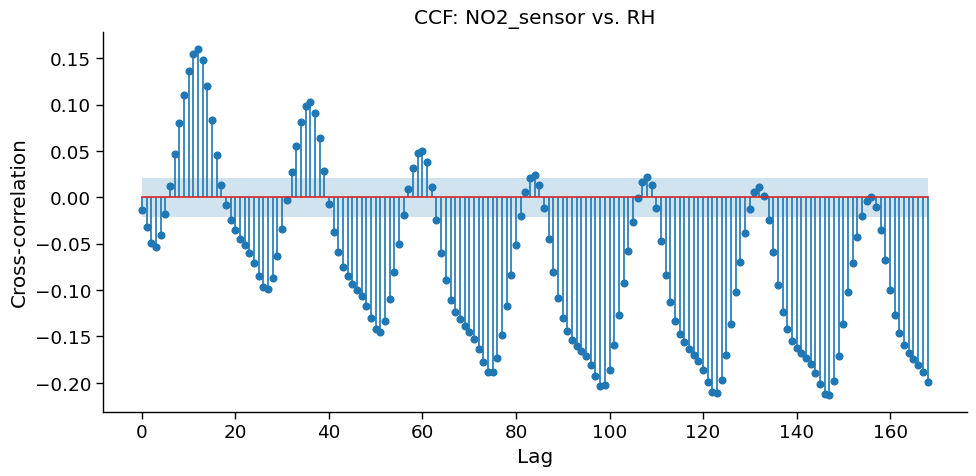

In [20]:
for col in [
    "CO_sensor",
    "NMHC_sensor",
    "NOX_sensor",
    "NO2_sensor",
    "O3_sensor",
    "T",
    "RH",
]:
    ax = plot_ccf(y=data.dropna()["NO2_sensor"], x=data.dropna()[col], lags=24 * 7)
    ax.set_title(f"CCF: NO2_sensor vs. {col}")
    ax.set_ylabel("Cross-correlation")
    ax.set_xlabel("Lag")
    plt.tight_layout()

We see that the CCF shows periodicity of 24 hours because all the time series have some daily seasonality. 

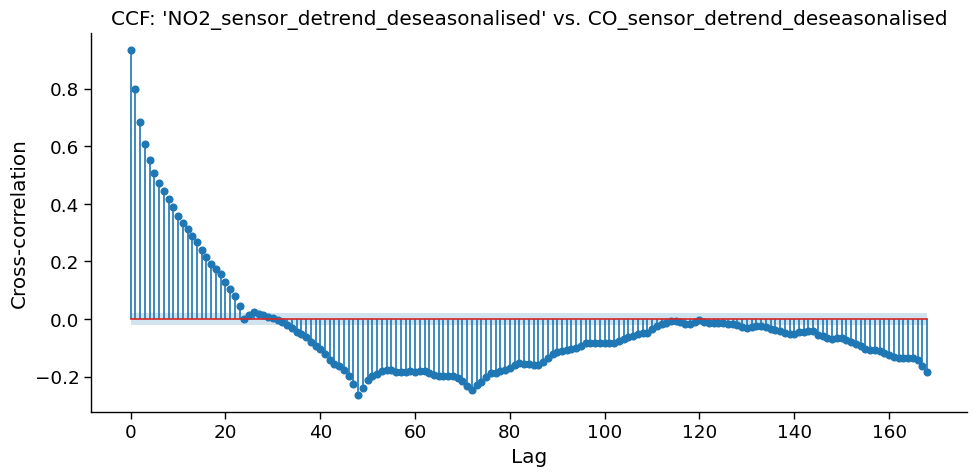

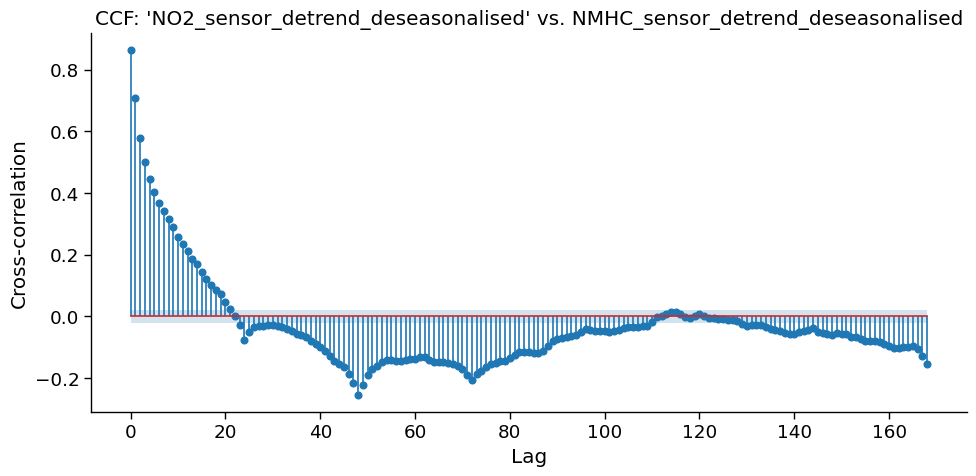

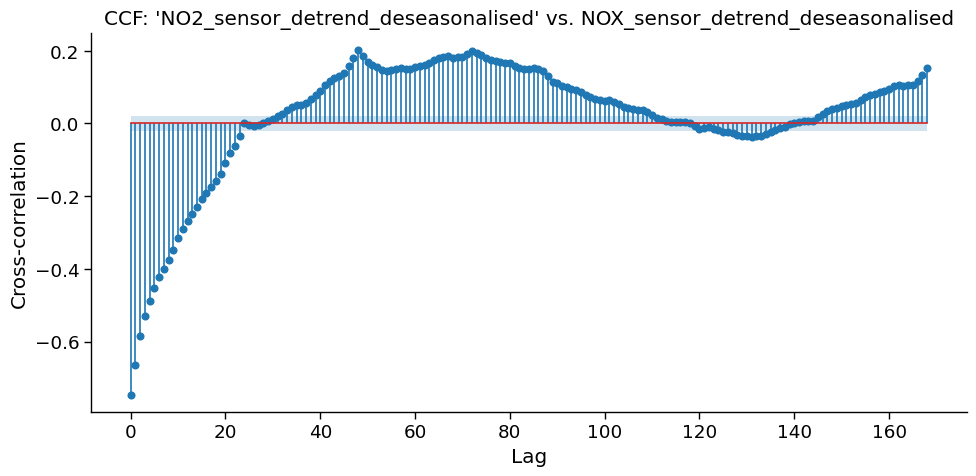

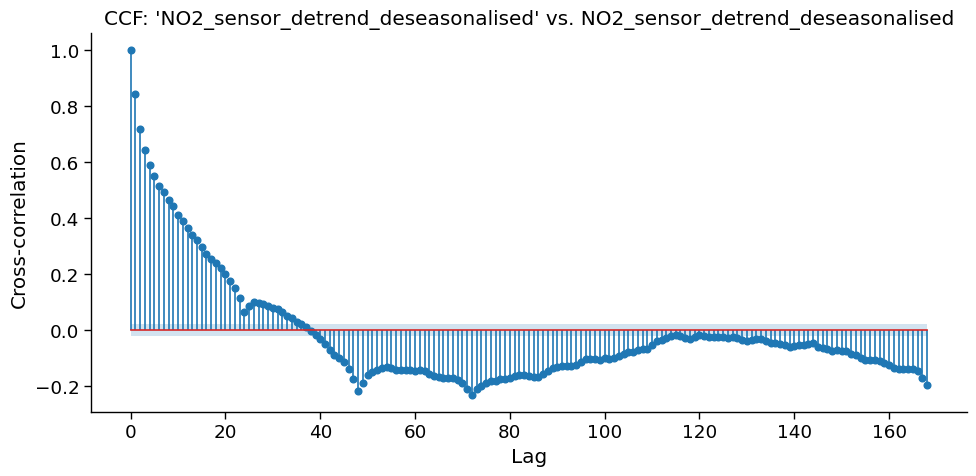

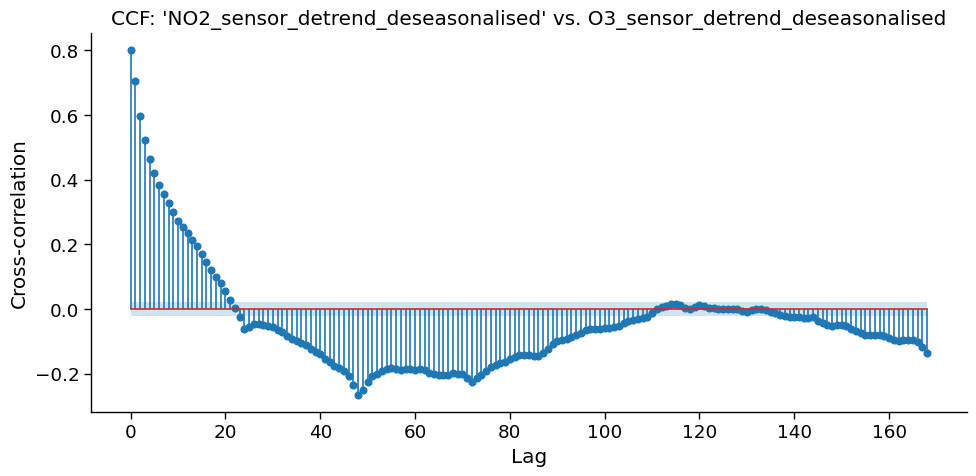

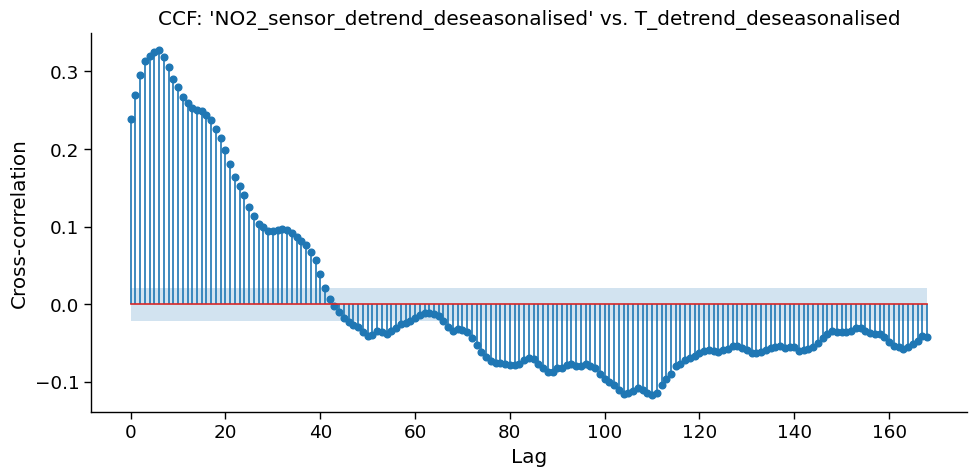

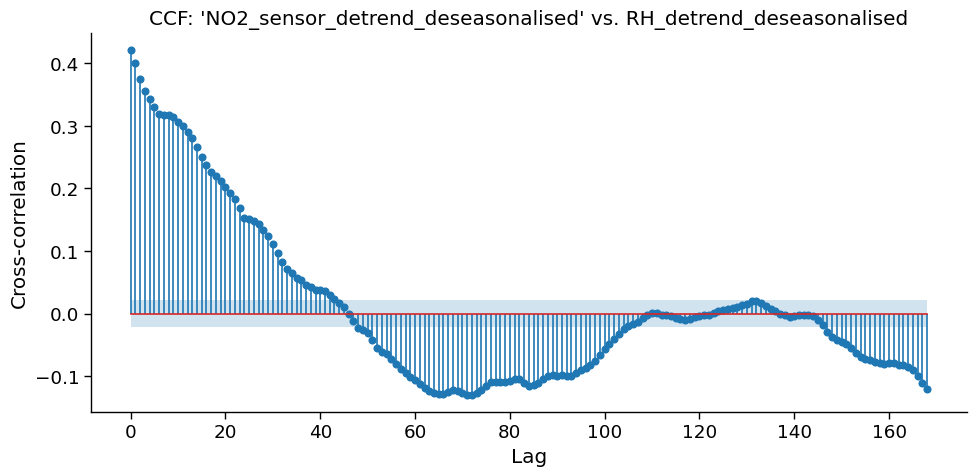

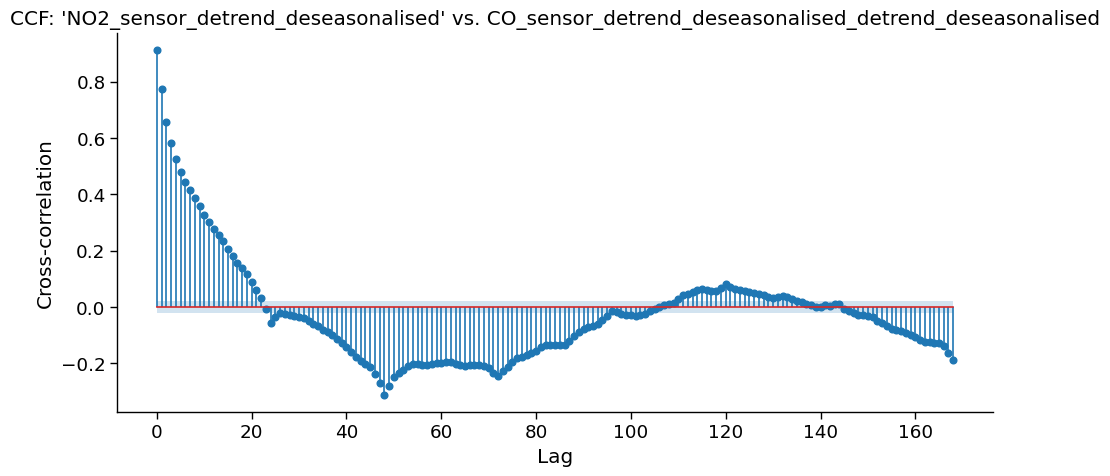

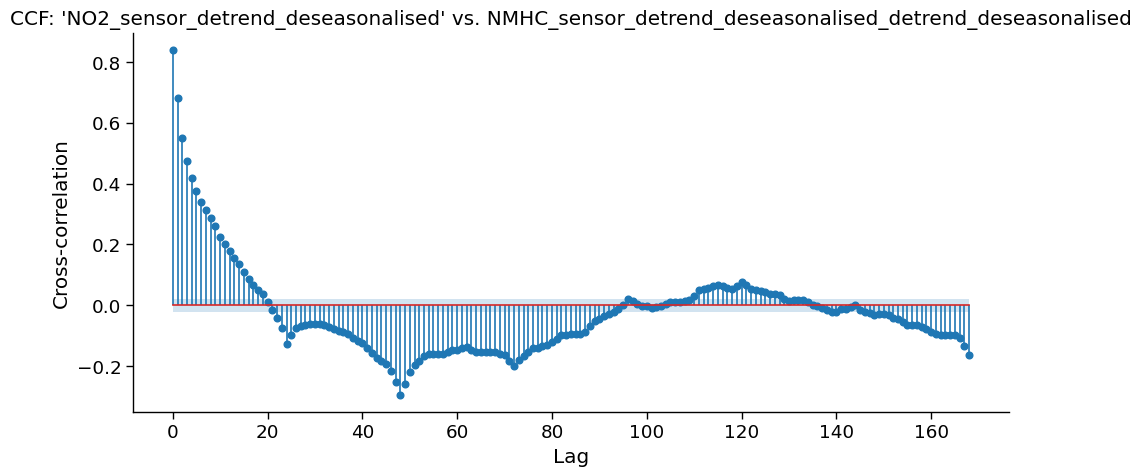

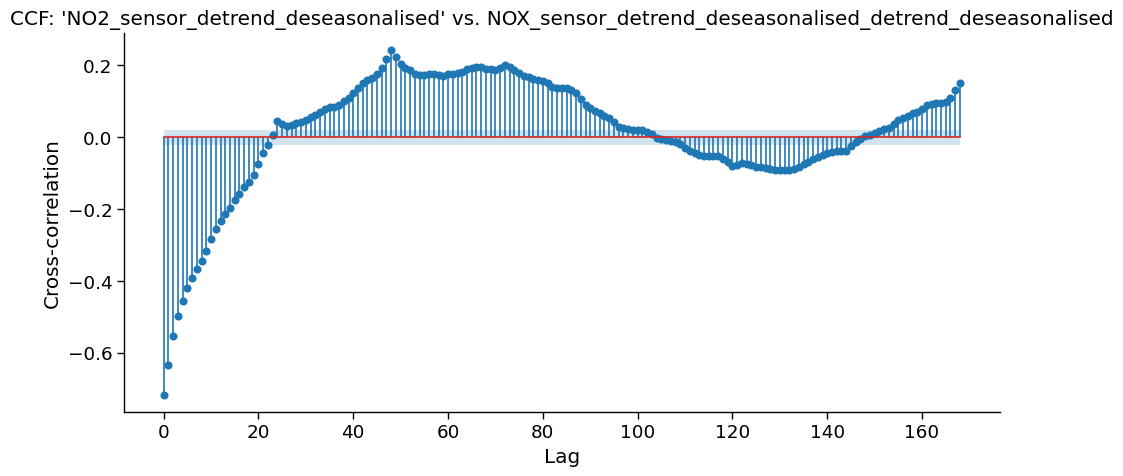

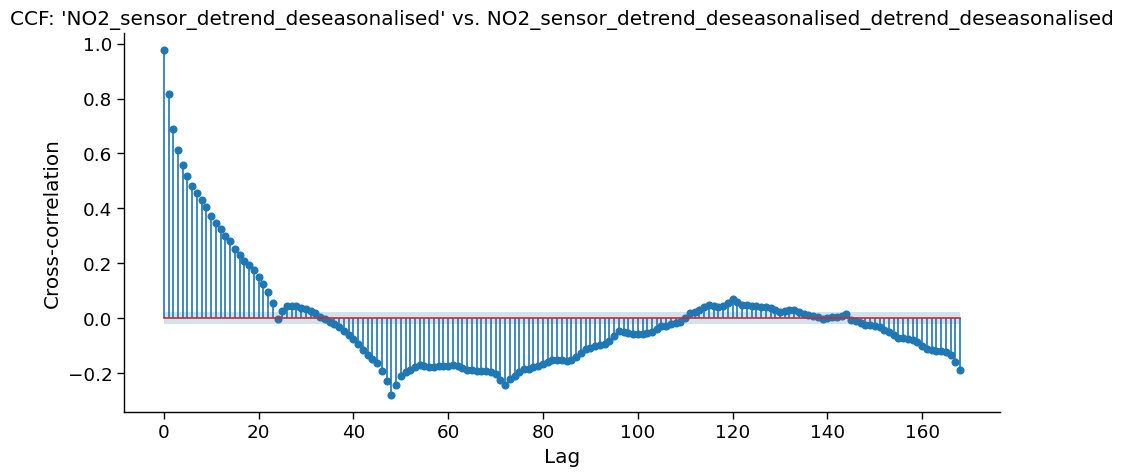

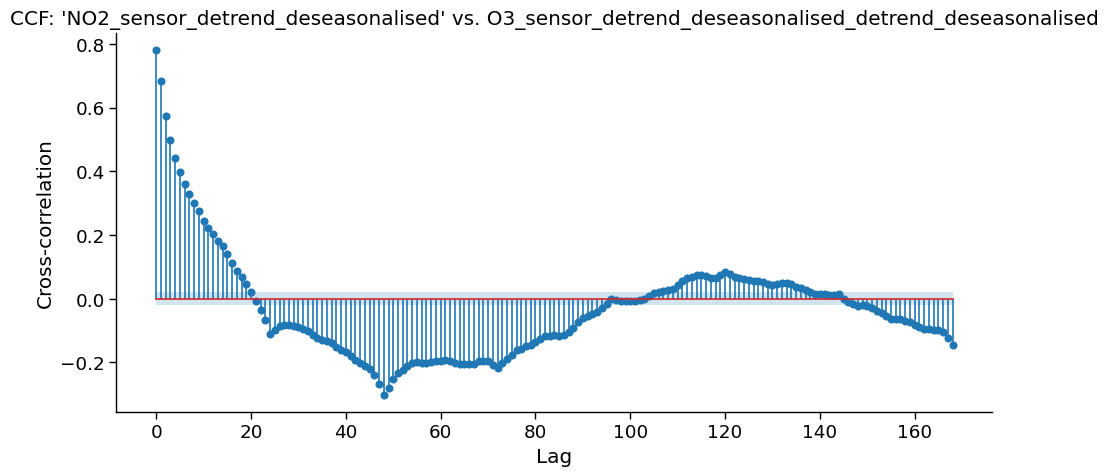

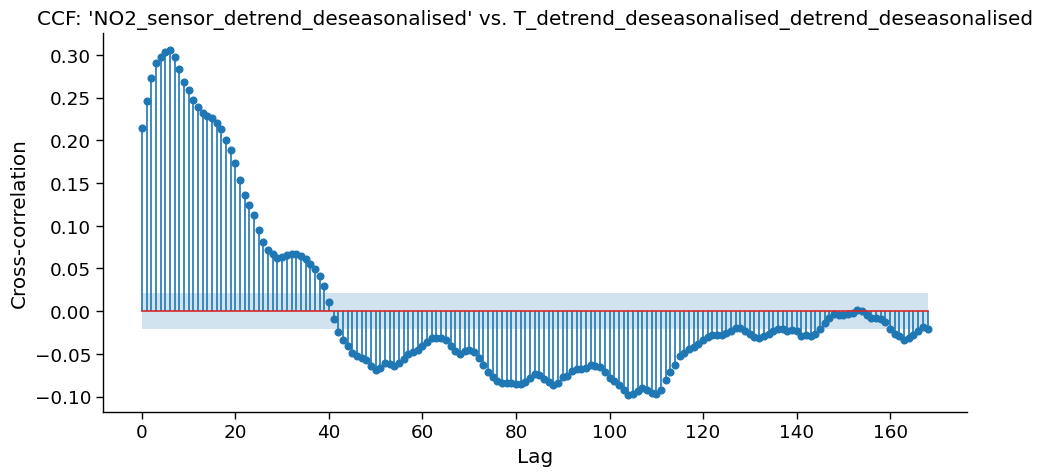

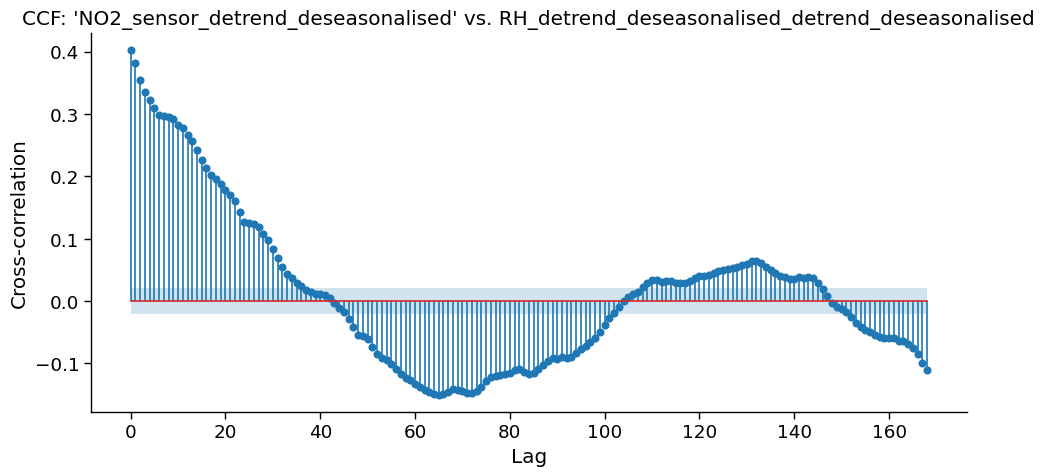

In [21]:
for col in [col for col in data.columns if "detrend" in col]:
    ax = plot_ccf(
        y=data.dropna()["NO2_sensor_detrend_deseasonalised"],
        x=data.dropna()[col],
        lags=24 * 7,
    )
    ax.set_title(f"CCF: 'NO2_sensor_detrend_deseasonalised' vs. {col}")
    ax.set_ylabel("Cross-correlation")
    ax.set_xlabel("Lag")
    plt.tight_layout()

Even after de-trending and de-seasonalising we see that it is difficult to infer useful lags from the CCF.   

We see some re-occuring peaks at 24 hour intervals still. This suggests we could include a lag of 24 hours of other features.   
However, rather than inferring any strong causality between `NO2_sensor` and any of the other features I am more inclined to conclude that any cross-correlation at 24 hour intervals is driven by the confounding factor of daily seasonality (i.e., traffic and commuting patterns, daylight, temperature, humiditiy).